# Steam Games Analysis
**Authors:** [Vu Brown](https://www.linkedin.com/in/austin-brown-b5211384/)

## Overview
***
This project explores classification and machine learning algorithms in an effort to predict playerbase feedback of PC video games.

## Business Problem
***
This project assumes that I've been approached by a small, new video game studio currently in the pre-production, conceptualization phase of the game design process. The developers are certain that they want to make a game that will receive positive feedback from their playerbase. I've been tasked with providing data-driven recommendations for what type of PC video games receive positive reviews.

## The Data
***
This project uses the Steam games dataset, which can be found [here](https://www.kaggle.com/trolukovich/steam-games-complete-dataset), and this section explores the dataset.

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve,\
accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

# pd.set_option('display.max_rows', 500) # Allows Jupyter Notebook to expand how much data is shown.
# pd.set_option('display.max_columns', 50) # Allows Jupyter Notebook to expand how much data is shown.

In [2]:
# Load DataFrame
df = pd.read_csv('./data/steam_games.csv')

In [3]:
df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


In [4]:
df.shape

(40833, 20)

In [5]:
df.columns

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

In [7]:
df.nunique(axis=0)

url                         40833
types                           3
name                        40749
desc_snippet                27410
recent_reviews               1299
all_reviews                  9209
release_date                 4107
developer                   17420
publisher                   15290
popular_tags                20852
game_details                 6016
languages                    5496
achievements                  360
genre                        1768
game_description            37496
mature_content               1267
minimum_requirements        14762
recommended_requirements    13836
original_price                681
discount_price               2060
dtype: int64

## Data Cleaning
***

There are over 40,000 records in this dataset and 20 feature columnns. Unfortunately, almost all of these are not useful in their current state. Data cleaning is going to VERY necessary, and is going to need to be VERY thorough.
    


### Data Cleaning Functions
These are some functions that will come in handy later on with the data cleaning process

In [8]:
# Function for finding specific string phrases
def find_records_with_phrase(series, string):
    series = series.map(lambda x: x if x.find(string) != -1 else '')
    
    shape = series.value_counts().shape
    vc = series.value_counts()
    return shape, vc

In [9]:
# Function for finding specific phrases ending with said phrase
def find_records_ending_with_phrase(series, string):
    series = series.map(lambda x: x if x[-len(string):] == string else '')
    
    shape = series.value_counts().shape
    vc = series.value_counts()
    return shape, vc

In [10]:
# Function for determining the amount of unique duplicate game titles and total amount of duplicate game titles in the dataset.
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    print('')
    
    return series_vcs, len(series_dupes)

### Removing Unnecessary Features
These are features I know will not be useful for any further data cleaning

In [11]:
#If time permitted, I would've tried to include publisher and popular_tags

initial_df_drop_columns = ['url',
                           'recent_reviews',
                           'developer',
                           'publisher',
                           'popular_tags',
                           'languages',
                           'achievements',
                           'game_description',
                           'minimum_requirements',
                           'recommended_requirements',
                           'discount_price'
                          ]

df.drop(columns=initial_df_drop_columns, inplace=True)

In [12]:
df.shape

(40833, 9)

### Removing all null records & non-application records from the `types` feature
***
Let's first take a look at null records in `types`:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   types           40831 non-null  object
 1   name            40817 non-null  object
 2   desc_snippet    27612 non-null  object
 3   all_reviews     28470 non-null  object
 4   release_date    37654 non-null  object
 5   game_details    40313 non-null  object
 6   genre           40395 non-null  object
 7   mature_content  2897 non-null   object
 8   original_price  35522 non-null  object
dtypes: object(9)
memory usage: 2.8+ MB


There are two null records in `types` that need to be investigated.

In [14]:
df.loc[df.types.isna()]

,types,name,desc_snippet,all_reviews,release_date,game_details,genre,mature_content,original_price
704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$29.99
35169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These 2 null records need to be removed since they provide no useful video game data.

In [15]:
df.dropna(subset=['types'], inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40831 entries, 0 to 40832
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   types           40831 non-null  object
 1   name            40817 non-null  object
 2   desc_snippet    27612 non-null  object
 3   all_reviews     28470 non-null  object
 4   release_date    37654 non-null  object
 5   game_details    40313 non-null  object
 6   genre           40395 non-null  object
 7   mature_content  2897 non-null   object
 8   original_price  35521 non-null  object
dtypes: object(9)
memory usage: 3.1+ MB


None

Next, let's take a look at what's in the `types` feature:

In [16]:
display(df.types.value_counts())
for _type in df.types.value_counts().index:
    display(df.loc[df.types == _type].head(5))

app       38021
bundle     2572
sub         238
Name: types, dtype: int64

,types,name,desc_snippet,all_reviews,release_date,game_details,genre,mature_content,original_price
0,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016","Single-player,Multi-player,Co-op,Steam Achieve...",Action,NaN,$19.99
1,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017","Multi-player,Online Multi-Player,Stats","Action,Adventure,Massively Multiplayer",Mature Content Description The developers de...,$29.99
2,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018","Single-player,Multi-player,Online Multi-Player...","Action,Adventure,Strategy",NaN,$39.99
3,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018","Multi-player,Online Multi-Player,Steam Worksho...","Action,Adventure,Massively Multiplayer",NaN,$44.99
4,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Action,Free to Play,Massively Multiplayer,RPG,...",NaN,Free


,types,name,desc_snippet,all_reviews,release_date,game_details,genre,mature_content,original_price
5,bundle,Grand Theft Auto V: Premium Online Edition,Grand Theft Auto V: Premium Online Edition bundle,NaN,NaN,"Single-player,Multi-player,Downloadable Conten...","Action,Adventure",NaN,NaN
15,bundle,Hearts of Iron IV: Mobilization Pack,Hearts of Iron IV: Mobilization Pack bundle,NaN,NaN,"Single-player,Multi-player,Online Multi-Player...","Simulation,Strategy",NaN,NaN
25,bundle,Portal Bundle,Portal Bundle bundle,NaN,NaN,"Single-player,Co-op,Steam Achievements,Full co...","Action,Adventure",NaN,NaN
44,bundle,The Binding of Isaac: Rebirth Complete Bundle,The Binding of Isaac: Rebirth Complete Bundle ...,NaN,NaN,"Single-player,Multi-player,Local Multi-Player,...","Action,Adventure,Indie",NaN,NaN
57,bundle,Stellaris: Ascension Pack,Stellaris: Ascension Pack bundle,NaN,NaN,"Single-player,Multi-player,Cross-Platform Mult...","Simulation,Strategy",NaN,NaN


,types,name,desc_snippet,all_reviews,release_date,game_details,genre,mature_content,original_price
39,sub,Doom Classic Complete,Doom Classic Complete bundle,NaN,NaN,"Single-player,Multi-player,Steam Cloud",Action,NaN,$14.99
63,sub,RESIDENT EVIL 2 / BIOHAZARD RE:2 Deluxe Edition,RESIDENT EVIL 2 / BIOHAZARD RE:2 Deluxe Editio...,NaN,NaN,"Single-player,Downloadable Content,Steam Achie...",Action,NaN,$69.99
216,sub,Dishonored: Death of the Outsider - Deluxe Bundle,Dishonored: Death of the Outsider - Deluxe Bun...,NaN,NaN,"Single-player,Steam Achievements,Full controll...",Action,NaN,$59.99
241,sub,Dishonored: Complete Collection,Dishonored: Complete Collection bundle,NaN,NaN,"Single-player,Downloadable Content,Steam Achie...","Action,Adventure",NaN,$79.99
264,sub,Wolfenstein: The Two Pack,Wolfenstein: The Two Pack bundle,NaN,NaN,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,$29.99


I only want to work with actual game titles, not game bundles. These records (`bundle`'s and `sub`'s) need to be removed.

In [17]:
types_removal = ['bundle', 'sub']
for _type in types_removal:
    df = df[df.types != _type]

display(df.types.value_counts())
display(df.info())

app    38021
Name: types, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38021 entries, 0 to 40832
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   types           38021 non-null  object
 1   name            38007 non-null  object
 2   desc_snippet    24802 non-null  object
 3   all_reviews     28470 non-null  object
 4   release_date    37654 non-null  object
 5   game_details    37546 non-null  object
 6   genre           37625 non-null  object
 7   mature_content  2897 non-null   object
 8   original_price  34999 non-null  object
dtypes: object(9)
memory usage: 2.9+ MB


None

In [18]:
df.drop(columns='types', inplace=True)

### Obtaining useful review data from `all_reviews`

Let's identify the null records in `all_reviews`.

In [19]:
display(df.loc[df.all_reviews.isna()].shape)
display(df.loc[df.all_reviews.isna()].head())

(9551, 8)

,name,desc_snippet,all_reviews,release_date,game_details,genre,mature_content,original_price
59,Grand Theft Auto IV: Complete Edition,PLEASE NOTE: Microsoft no longer supports crea...,NaN,"Oct 27, 2010","Single-player,Multi-player,Partial Controller ...","Action,Adventure",NaN,$29.99
90,Super Neptunia RPG / 勇者ネプテューヌ /勇者戰幾少女,"Neptune, stricken with amnesia, awakes in a my...",NaN,"Jun 20, 2019","Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG",NaN,$39.99
180,Steel Division 2,Steel Division 2 is a historically-accurate WW...,NaN,20/06/2019,"Single-player,Multi-player,Online Multi-Player...","Indie,Strategy",NaN,$39.99
187,Total War: SHOGUN 2,Total War: SHOGUN 2 is the perfect mix of real...,NaN,"Mar 15, 2011","Single-player,Multi-player,Co-op,Steam Achieve...",Strategy,NaN,$29.99
199,My Friend Pedro,My Friend Pedro is a violent ballet about frie...,NaN,"Jun 20, 2019","Single-player,Steam Achievements,Full controll...","Action,Indie",Mature Content Description The developers de...,$19.99


Unfortunatetly, review data is crucial to this prediction process, so all null valued records need to be removed.

In [20]:
df.dropna(subset=['all_reviews'], inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28470 entries, 0 to 40811
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            28470 non-null  object
 1   desc_snippet    21071 non-null  object
 2   all_reviews     28470 non-null  object
 3   release_date    28338 non-null  object
 4   game_details    28079 non-null  object
 5   genre           28197 non-null  object
 6   mature_content  2165 non-null   object
 7   original_price  27807 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


None

Now let's take a look at the unique values in the feature.

In [21]:
display(df.all_reviews.value_counts().head(10))
display(df.all_reviews.value_counts().tail(10))

1 user reviews,- Need more user reviews to generate a score               3023
2 user reviews,- Need more user reviews to generate a score               1926
3 user reviews,- Need more user reviews to generate a score               1469
4 user reviews,- Need more user reviews to generate a score               1082
5 user reviews,- Need more user reviews to generate a score                948
6 user reviews,- Need more user reviews to generate a score                838
7 user reviews,- Need more user reviews to generate a score                693
8 user reviews,- Need more user reviews to generate a score                600
9 user reviews,- Need more user reviews to generate a score                528
Positive,(10),- 90% of the 10 user reviews for this game are positive.      83
Name: all_reviews, dtype: int64

Mostly Positive,(137),- 72% of the 137 user reviews for this game are positive.    1
Mostly Positive,(975),- 77% of the 975 user reviews for this game are positive.    1
Mixed,(23),- 69% of the 23 user reviews for this software are positive.            1
Mostly Negative,(69),- 37% of the 69 user reviews for this game are positive.      1
Mostly Negative,(122),- 34% of the 122 user reviews for this game are positive.    1
Mostly Positive,(293),- 78% of the 293 user reviews for this game are positive.    1
Very Positive,(972),- 83% of the 972 user reviews for this game are positive.      1
Very Positive,(277),- 88% of the 277 user reviews for this game are positive.      1
Mostly Positive,(737),- 78% of the 737 user reviews for this game are positive.    1
Very Positive,(226),- 85% of the 226 user reviews for this game are positive.      1
Name: all_reviews, dtype: int64

Looks like there are a lot of records that don't have enough reviews to even have a positive or negative rating. Unfortunately, these records will also need to be removed.

In [22]:
for review_num in range(1, 10):
    not_enough_reviews = str(review_num)+' user reviews,- Need more user reviews to generate a score'
    df = df[df.all_reviews != not_enough_reviews]

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17363 entries, 0 to 40811
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            17363 non-null  object
 1   desc_snippet    14653 non-null  object
 2   all_reviews     17363 non-null  object
 3   release_date    17311 non-null  object
 4   game_details    17156 non-null  object
 5   genre           17244 non-null  object
 6   mature_content  1500 non-null   object
 7   original_price  16989 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


None

Let's now move on to extracting the number of reviews and the percentage of positive reviews from each record.

In [23]:
display(df.all_reviews.value_counts().head(10))
display(df.all_reviews.value_counts().tail(10))

Positive,(10),- 90% of the 10 user reviews for this game are positive.           83
Positive,(10),- 100% of the 10 user reviews for this game are positive.          82
Positive,(11),- 100% of the 11 user reviews for this game are positive.          82
Positive,(12),- 100% of the 12 user reviews for this game are positive.          79
Mostly Positive,(10),- 70% of the 10 user reviews for this game are positive.    78
Positive,(11),- 81% of the 11 user reviews for this game are positive.           72
Positive,(10),- 80% of the 10 user reviews for this game are positive.           70
Positive,(13),- 92% of the 13 user reviews for this game are positive.           68
Positive,(11),- 90% of the 11 user reviews for this game are positive.           68
Positive,(12),- 83% of the 12 user reviews for this game are positive.           65
Name: all_reviews, dtype: int64

Very Positive,(277),- 88% of the 277 user reviews for this game are positive.                  1
Mostly Positive,(737),- 78% of the 737 user reviews for this game are positive.                1
Mixed,(83),- 69% of the 83 user reviews for this game are positive.                            1
Very Positive,(390),- 81% of the 390 user reviews for this game are positive.                  1
Very Positive,(193),- 83% of the 193 user reviews for this game are positive.                  1
Very Positive,(406),- 94% of the 406 user reviews for this game are positive.                  1
Mixed,(76),- 67% of the 76 user reviews for this game are positive.                            1
Overwhelmingly Positive,(2,400),- 97% of the 2,400 user reviews for this game are positive.    1
Mostly Positive,(182),- 75% of the 182 user reviews for this game are positive.                1
Very Positive,(226),- 85% of the 226 user reviews for this game are positive.                  1
Name: all_reviews, dtype: int6

Let's first create a list for each review statement where the statement is separated by commas.

In [24]:
df['all_reviews_list'] = df.all_reviews.map(lambda x: x.split(','))

In [25]:
df['len_all_reviews'] = df.all_reviews_list.map(lambda x: len(x))

display(df.len_all_reviews.value_counts())

3    15102
5     2244
8        8
6        7
7        2
Name: len_all_reviews, dtype: int64

There appears to be 5 unique statement types based on the list lengths, so let's take a look at those.

In [26]:
for review in df.all_reviews_list:
    review_len = len(review)
    if review_len == 3:
        display(review)
        break

['Mixed', '(904)', '- 44% of the 904 user reviews for this game are positive.']

In [27]:
for review in df.all_reviews_list:
    review_len = len(review)
    if review_len == 5:
        display(review)
        break

['Very Positive',
 '(42',
 '550)',
 '- 92% of the 42',
 '550 user reviews for this game are positive.']

In [28]:
for review in df.all_reviews_list:
    review_len = len(review)
    if review_len == 6:
        display(review)
        break

['Very Positive',
 '(182)',
 '*',
 '- 81% of the 182 user reviews for this game are positive.',
 'This product has experienced one or more periods of off-topic review activity.  Based on your preferences',
 " the reviews within these periods have been excluded from this product's Review Score."]

In [29]:
for review in df.all_reviews_list:
    review_len = len(review)
    if review_len == 7:
        display(review)
        break

['Very Positive',
 '(1',
 '015',
 '621)',
 '- 85% of the 1',
 '015',
 '621 user reviews for this game are positive.']

In [30]:
for review in df.all_reviews_list:
    review_len = len(review)
    if review_len == 8:
        display(review)
        break

['Very Positive',
 '(4',
 '437)',
 '*',
 '- 86% of the 4',
 '437 user reviews for this game are positive.',
 'This product has experienced one or more periods of off-topic review activity.  Based on your preferences',
 " the reviews within these periods have been excluded from this product's Review Score."]

From here, we can set up two mapping methods to extract the number of reviews and the percentage of positive reviews for each of the unique review statements.

In [31]:
df['number_of_all_reviews'] = df.all_reviews_list.map(lambda x: int(x[1][1:-1]) if len(x) == 3 or len(x) == 6 else\
                                                               (int((x[1]+x[2])[1:-1]) if len(x) == 5 or len(x) == 8 else\
                                                               (int((x[1]+x[2]+x[3])[1:-1]) if len(x) == 7 else 0)))

display(df.number_of_all_reviews)

0         42550
1        836608
2          7030
3        167115
4         11481
          ...  
40557        17
40598        14
40611        11
40728        10
40811        14
Name: number_of_all_reviews, Length: 17363, dtype: int64

In [32]:
df.loc[df.number_of_all_reviews == 0]

,name,desc_snippet,all_reviews,release_date,game_details,genre,mature_content,original_price,all_reviews_list,len_all_reviews,number_of_all_reviews


In [33]:
df['percentage_of_positive_all_reviews_untuned'] = df.all_reviews_list.map(lambda x: x[-1][2:6] if len(x) == 3 else\
                                                                                    (x[-2][2:6] if len(x) == 5 else\
                                                                                    (x[-3][2:6] if len(x) == 6 or len(x) == 7 else\
                                                                                    (x[-4][2:6] if len(x) == 8 else ''))))

display(df.percentage_of_positive_all_reviews_untuned.value_counts().head(10))

100%    722
90%     594
92%     510
88%     475
80%     474
91%     452
94%     451
85%     424
93%     422
86%     419
Name: percentage_of_positive_all_reviews_untuned, dtype: int64

In [34]:
df['percentage_of_positive_all_reviews'] = df.percentage_of_positive_all_reviews_untuned.map(lambda x: int(x[x.find('%')-3:x.find('%')]) if x[-1] == '%' else\
                                                                                                      (int(x[x.find('%')-2:x.find('%')]) if x[-2] == '%' else\
                                                                                                      (int(x[x.find('%')-1:x.find('%')]) if x[-3] == '%' else 0)))

display(df.percentage_of_positive_all_reviews.value_counts())

100    722
90     594
92     510
88     475
80     474
      ... 
5        4
6        4
3        2
4        2
2        1
Name: percentage_of_positive_all_reviews, Length: 100, dtype: int64

Looks like those worked! Let's now define a positive review as at least having 80%. Anything lower is considered a negative review. Notice that this is different from how Steam categorizes positive review percentages, but this method will work better for our predictive models later on.

In [35]:
df['positive_reviews'] = df.percentage_of_positive_all_reviews.map(lambda x: 1 if x >= 80 else 0)

In [36]:
df.positive_reviews.value_counts(normalize=True)

0    0.515579
1    0.484421
Name: positive_reviews, dtype: float64

There seems to be a very even distribution of positive and negative reviews which will be nice later on since we won't need to perform any oversampling routines.

Now, let's remove the columns from the dataframe that we will no longer need for review related purposes.

In [37]:
all_reviews_drop_columns = ['all_reviews',
                            'all_reviews_list',
                            'len_all_reviews',
                            'percentage_of_positive_all_reviews_untuned'
                           ]

df.drop(columns=all_reviews_drop_columns, inplace=True)

### Converting `original_price` to `float` dtype

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17363 entries, 0 to 40811
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   name                                17363 non-null  object
 1   desc_snippet                        14653 non-null  object
 2   release_date                        17311 non-null  object
 3   game_details                        17156 non-null  object
 4   genre                               17244 non-null  object
 5   mature_content                      1500 non-null   object
 6   original_price                      16989 non-null  object
 7   number_of_all_reviews               17363 non-null  int64 
 8   percentage_of_positive_all_reviews  17363 non-null  int64 
 9   positive_reviews                    17363 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


Let's identify the null records in `original_price`.

In [39]:
display(df.loc[df.original_price.isna()].shape)
display(df.loc[df.original_price.isna()])

(374, 10)

,name,desc_snippet,release_date,game_details,genre,mature_content,original_price,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews
140,Ori and the Blind Forest,“Ori and the Blind Forest” tells the tale of a...,"Mar 11, 2015","Single-player,Steam Achievements,Full controll...",Action,NaN,NaN,24439,96,1
179,iRacing,We are the world’s premier motorsports racing ...,"Jan 12, 2015","Single-player,Multi-player,MMO,Partial Control...","Massively Multiplayer,Racing,Simulation,Sports",NaN,NaN,363,77,0
629,Operation: New Earth,Operation: New Earth is an intense sci-fi mult...,"Dec 14, 2016","Online Multi-Player,MMO,Cross-Platform Multipl...","Free to Play,Massively Multiplayer,Simulation,...",NaN,NaN,341,49,0
881,The Horus Heresy: Legions,Build a deck of unstoppable Space Marines and ...,"Mar 28, 2019","Single-player,Online Multi-Player,Cross-Platfo...","Free to Play,Strategy",Mature Content Description The developers de...,NaN,287,65,0
2024,STEINS;GATE ELITE,STEINS;GATE ELITE follows a rag-tag band of te...,"Feb 19, 2019","Single-player,Steam Achievements,Partial Contr...",Adventure,Mature Content Description The developers de...,NaN,223,89,1
...,...,...,...,...,...,...,...,...,...,...
39111,Super Cyborg Demo,Super Cyborg is an old school non-stop hardcor...,"Jul 8, 2015","Single-player,Co-op,Local Co-op,Game demo,Part...","Action,Indie",NaN,NaN,12,83,1
39113,Castlevania: Lords of Shadow 2 Demo,"Dracula, weak and yearning release from immort...","Feb 11, 2014","Single-player,Game demo,Full controller support","Action,Adventure",NaN,NaN,108,88,1
39535,Indivisible Prototype Demo,This prototype beta will give you an early loo...,"Nov 23, 2015","Single-player,Game demo,Full controller support","Action,Indie,RPG",NaN,NaN,120,98,1
39715,Estranged: Act II,Estranged: Act II follows the story of a fishe...,"Mar 17, 2017","Single-player,Full controller support","Action,Adventure,Casual,Indie,Early Access",NaN,NaN,711,80,1


For the sake of time, I will be removing these null valued records. If I had more time, I might consider using the mean valued price of all of the games, but that would be a very complicated process given that the values in this feature are currently strings.

In [40]:
df.dropna(subset=['original_price'], inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16989 entries, 0 to 40811
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   name                                16989 non-null  object
 1   desc_snippet                        14424 non-null  object
 2   release_date                        16949 non-null  object
 3   game_details                        16793 non-null  object
 4   genre                               16883 non-null  object
 5   mature_content                      1464 non-null   object
 6   original_price                      16989 non-null  object
 7   number_of_all_reviews               16989 non-null  int64 
 8   percentage_of_positive_all_reviews  16989 non-null  int64 
 9   positive_reviews                    16989 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


None

Let's take a look at the unique values in this feature.

In [41]:
display(df.original_price.value_counts().sort_index().shape)
display(df.original_price.value_counts().sort_index())

(402,)

$0.50                        1
$0.98                        1
$0.99                     1111
$1.00                        2
$1.29                        2
                          ... 
Worbital: Online Demo        1
eden* Demo                   1
免费试玩！                        1
灰烬天国 UnconqueredCastle       1
试玩版                          1
Name: original_price, Length: 402, dtype: int64

There appear to be a bunch of non-valued prices, and, after some investigation, I've determined that only the following few, which refer to free games, should actually be kept and utilized for modeling purposes as they actually pertain to a true valued price of $0.00.

In [42]:
df['original_price_untuned'] = df.original_price.map(lambda x: '$0.00' if x[:] == 'Free' or\
                                                                          x.find('Free To Play') != -1 or\
                                                                          x.find('Free to Play') != -1 or\
                                                                          x.find('Play now for free') != -1 or\
                                                                          x.find('Play for Free!') != -1 else\
                                                                          x)

In [43]:
display(df.info())
display(df.original_price_untuned.value_counts().sort_index().shape)
display(df.original_price_untuned.value_counts().sort_index())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16989 entries, 0 to 40811
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   name                                16989 non-null  object
 1   desc_snippet                        14424 non-null  object
 2   release_date                        16949 non-null  object
 3   game_details                        16793 non-null  object
 4   genre                               16883 non-null  object
 5   mature_content                      1464 non-null   object
 6   original_price                      16989 non-null  object
 7   number_of_all_reviews               16989 non-null  int64 
 8   percentage_of_positive_all_reviews  16989 non-null  int64 
 9   positive_reviews                    16989 non-null  int64 
 10  original_price_untuned              16989 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


None

(398,)

$0.00                     1930
$0.50                        1
$0.98                        1
$0.99                     1111
$1.00                        2
                          ... 
Worbital: Online Demo        1
eden* Demo                   1
免费试玩！                        1
灰烬天国 UnconqueredCastle       1
试玩版                          1
Name: original_price_untuned, Length: 398, dtype: int64

In [44]:
display(df.loc[df.original_price_untuned == '1.020']) # Should look into this value if time permits, since there are
                                                      # a lot of useful record with this unacceptable price value.
display(df.loc[df.original_price_untuned == '650560'])

,name,desc_snippet,release_date,game_details,genre,mature_content,original_price,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_untuned
13,Call of Duty®: Modern Warfare® Remastered,One of the most critically-acclaimed games in ...,"Jul 27, 2017","Single-player,Online Multi-Player,Online Co-op...",Action,NaN,1.020,1118,51,0,1.020
20,Call of Duty®: Black Ops,The biggest first-person action series of all ...,"Nov 9, 2010","Single-player,Multi-player,Co-op,Steam Achieve...",Action,NaN,1.020,4190,84,1,1.020
75,Call of Duty®: WWII,Call of Duty® returns to its roots with Call o...,"Nov 2, 2017","Single-player,Multi-player,Online Multi-Player...",Action,Mature Content Description The developers de...,1.020,12703,54,0,1.020
183,Call of Duty®: Black Ops II,Pushing the boundaries of what fans have come ...,"Nov 12, 2012","Single-player,Multi-player,Co-op,Steam Achieve...",Action,NaN,1.020,9096,82,1,1.020
215,Call of Duty: World at War,"Call of Duty is back, redefining war like you'...","Nov 18, 2008","Single-player,Multi-player,Co-op",Action,NaN,1.020,17438,92,1,1.020
233,Call of Duty®: Modern Warfare® 2,The most-anticipated game of the year and the ...,"Nov 12, 2009","Single-player,Multi-player,Co-op,Steam Achieve...",Action,NaN,1.020,14567,89,1,1.020
275,Vampire: The Masquerade - Bloodlines,Vampire®: The Masquerade-Bloodlines™ delivers ...,"Nov 16, 2004",Single-player,Action,NaN,1.020,5844,93,1,1.020
349,Call of Duty®: Black Ops III,Call of Duty®: Black Ops III Zombies Chronicle...,"Nov 5, 2015","Single-player,Multi-player,Co-op,Steam Achieve...","Action,Adventure",NaN,1.020,23982,64,0,1.020
511,Call of Duty® 4: Modern Warfare®,The new action-thriller from the award-winning...,"Nov 12, 2007","Single-player,Multi-player",Action,NaN,1.020,7518,90,1,1.020
1125,Call of Duty: United Offensive,Award-winning developer Gray Matter Interactiv...,"Sep 15, 2004","Single-player,Multi-player",Action,NaN,1.020,517,83,1,1.020


,name,desc_snippet,release_date,game_details,genre,mature_content,original_price,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_untuned
18639,Slime-san: Superslime Edition,Slime-san was minding his own business when su...,"Apr 7, 2017","Single-player,Local Multi-Player,Local Co-op,S...","Action,Adventure,Indie",NaN,650560,27,92,1,650560


In [45]:
# For now, I will remove them.
df = df[df.original_price_untuned != '1.020']
df = df[df.original_price_untuned != '650560']

display(df.loc[df.original_price_untuned == '1.020'])
display(df.loc[df.original_price_untuned == '650560'])
display(df.original_price_untuned.value_counts().sort_index())
display(df.info())

,name,desc_snippet,release_date,game_details,genre,mature_content,original_price,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_untuned


,name,desc_snippet,release_date,game_details,genre,mature_content,original_price,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_untuned


$0.00                     1930
$0.50                        1
$0.98                        1
$0.99                     1111
$1.00                        2
                          ... 
Worbital: Online Demo        1
eden* Demo                   1
免费试玩！                        1
灰烬天国 UnconqueredCastle       1
试玩版                          1
Name: original_price_untuned, Length: 396, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16943 entries, 0 to 40811
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   name                                16943 non-null  object
 1   desc_snippet                        14378 non-null  object
 2   release_date                        16903 non-null  object
 3   game_details                        16747 non-null  object
 4   genre                               16837 non-null  object
 5   mature_content                      1463 non-null   object
 6   original_price                      16943 non-null  object
 7   number_of_all_reviews               16943 non-null  int64 
 8   percentage_of_positive_all_reviews  16943 non-null  int64 
 9   positive_reviews                    16943 non-null  int64 
 10  original_price_untuned              16943 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


None

Let's now extract the float values correlated with the prices.

In [46]:
df['original_price_tuned'] = df.original_price_untuned.map(lambda x: float(x[1:]) if x[0] == '$' else -1.0)

display(df.info())
display(df.original_price_tuned.value_counts().sort_index())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16943 entries, 0 to 40811
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16943 non-null  object 
 1   desc_snippet                        14378 non-null  object 
 2   release_date                        16903 non-null  object 
 3   game_details                        16747 non-null  object 
 4   genre                               16837 non-null  object 
 5   mature_content                      1463 non-null   object 
 6   original_price                      16943 non-null  object 
 7   number_of_all_reviews               16943 non-null  int64  
 8   percentage_of_positive_all_reviews  16943 non-null  int64  
 9   positive_reviews                    16943 non-null  int64  
 10  original_price_untuned              16943 non-null  object 
 11  original_price_tuned                16943

None

-1.00       159
 0.00      1930
 0.50         1
 0.98         1
 0.99      1111
           ... 
 475.60      13
 501.87      52
 514.39      19
 598.00       1
 624.74      18
Name: original_price_tuned, Length: 267, dtype: int64

In [47]:
df = df[df.original_price_tuned != -1.00]

display(df.info())
display(df.original_price_tuned.value_counts().sort_index())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16784 entries, 0 to 40811
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16784 non-null  object 
 1   desc_snippet                        14220 non-null  object 
 2   release_date                        16745 non-null  object 
 3   game_details                        16593 non-null  object 
 4   genre                               16679 non-null  object 
 5   mature_content                      1441 non-null   object 
 6   original_price                      16784 non-null  object 
 7   number_of_all_reviews               16784 non-null  int64  
 8   percentage_of_positive_all_reviews  16784 non-null  int64  
 9   positive_reviews                    16784 non-null  int64  
 10  original_price_untuned              16784 non-null  object 
 11  original_price_tuned                16784

None

0.00      1930
0.50         1
0.98         1
0.99      1111
1.00         2
          ... 
475.60      13
501.87      52
514.39      19
598.00       1
624.74      18
Name: original_price_tuned, Length: 266, dtype: int64

Now, let's remove the columns from the dataframe that we will no longer need for price related purposes.

In [48]:
original_price_drop_columns = ['original_price',
                               'original_price_untuned'
                              ]

df.drop(columns=original_price_drop_columns, inplace=True)

### Examining `mature_content` feature

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16784 entries, 0 to 40811
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16784 non-null  object 
 1   desc_snippet                        14220 non-null  object 
 2   release_date                        16745 non-null  object 
 3   game_details                        16593 non-null  object 
 4   genre                               16679 non-null  object 
 5   mature_content                      1441 non-null   object 
 6   number_of_all_reviews               16784 non-null  int64  
 7   percentage_of_positive_all_reviews  16784 non-null  int64  
 8   positive_reviews                    16784 non-null  int64  
 9   original_price_tuned                16784 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.4+ MB


There appears to be a big problem with this feature. A significant amount of games that should have a Mature Content description do not have one. For this reason, I will have to drop this feature.

In [50]:
df.drop(columns=['mature_content'], inplace=True)

### Creating `genre` features

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16784 entries, 0 to 40811
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16784 non-null  object 
 1   desc_snippet                        14220 non-null  object 
 2   release_date                        16745 non-null  object 
 3   game_details                        16593 non-null  object 
 4   genre                               16679 non-null  object 
 5   number_of_all_reviews               16784 non-null  int64  
 6   percentage_of_positive_all_reviews  16784 non-null  int64  
 7   positive_reviews                    16784 non-null  int64  
 8   original_price_tuned                16784 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.3+ MB


Let's take a look at the null records in `genre`.

In [52]:
display(df.loc[df.genre.isna()].shape)
display(df.loc[df.genre.isna()])

(105, 9)

,name,desc_snippet,release_date,game_details,genre,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned
528,Middle-earth™: Shadow of Mordor™,Fight through Mordor and uncover the truth of ...,"Sep 30, 2014","Single-player,Steam Achievements,Full controll...",NaN,34978,91,1,19.99
1613,Sonic Adventure DX,An ancient evil lurking within the Master Emer...,"Mar 4, 2011","Single-player,Partial Controller Support",NaN,2726,86,1,7.99
2254,Red Faction Guerrilla Re-Mars-tered,Red Faction: Guerrilla re-defines the limits o...,"Jul 3, 2018","Single-player,Multi-player,Online Multi-Player...",NaN,1123,75,0,19.99
2574,NEKOPARA OVA,Nekopara is now turned into an anime! You can'...,"Dec 21, 2017","Steam Trading Cards,Captions available",NaN,613,91,1,29.99
3220,Deliverance: The Making of Kingdom Come,This documentary charts the more than six-year...,"Dec 20, 2018",NaN,NaN,79,100,1,4.99
...,...,...,...,...,...,...,...,...,...
27732,The Crew™ Street Edition Pack,NaN,"Jan 27, 2015",Downloadable Content,NaN,22,27,0,6.99
29138,The Hunger Games 360,This is a VR video—a brand new kind of video t...,"Aug 18, 2012",NaN,NaN,32,25,0,0.00
29375,Alien Covenant In Utero,ALIEN: COVENANT In Utero is a 360-degree virtu...,"May 10, 2017",NaN,NaN,19,26,0,0.00
29379,Iron Wings,ARCADE-ACTION WWII air combat -Player takes on...,"May 31, 2017","Single-player,Steam Achievements,Full controll...",NaN,62,32,0,9.99


Similar to before, for the sake of time, I will be removing these null valued records.

In [53]:
df.dropna(subset=['genre'], inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16679 entries, 0 to 40811
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16679 non-null  object 
 1   desc_snippet                        14128 non-null  object 
 2   release_date                        16641 non-null  object 
 3   game_details                        16533 non-null  object 
 4   genre                               16679 non-null  object 
 5   number_of_all_reviews               16679 non-null  int64  
 6   percentage_of_positive_all_reviews  16679 non-null  int64  
 7   positive_reviews                    16679 non-null  int64  
 8   original_price_tuned                16679 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.3+ MB


None

In [54]:
df.genre.value_counts()

Action,Indie                                                     965
Action                                                           958
Adventure,Indie                                                  741
Action,Adventure,Indie                                           685
Casual,Indie                                                     611
                                                                ... 
Adventure,Indie,Massively Multiplayer,Simulation,Early Access      1
Action,Indie,Racing,Simulation,Strategy                            1
Action,Massively Multiplayer,RPG,Early Access                      1
Simulation,Utilities                                               1
Utilities,Game Development                                         1
Name: genre, Length: 906, dtype: int64

Similiar to before with the review statements, I can split each genre list for each record by a comma.

In [55]:
df['genre_list'] = df.genre.map(lambda x: x.split(','))

In [56]:
display(df.genre_list.values)

array([list(['Action']),
       list(['Action', 'Adventure', 'Massively Multiplayer']),
       list(['Action', 'Adventure', 'Strategy']), ...,
       list(['Adventure', 'Indie']), list(['Indie']),
       list(['Action', 'Adventure', 'Casual', 'Indie', 'RPG'])],
      dtype=object)

Now I can create a list of unique genres.

In [57]:
list_genres = []

for genre_record in df.genre_list.values:
    list_genres += genre_record

list_genres = list(set(list_genres))
list_genres.sort()
list_genres

['Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Early Access',
 'Education',
 'Free to Play',
 'Game Development',
 'Indie',
 'Massively Multiplayer',
 'Movie',
 'Photo Editing',
 'RPG',
 'Racing',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Valve',
 'Video Production',
 'Web Publishing']

And now I can create new features in the dataframe for those unique genres and specify a 1 if it applies to the record or 0 if it doesn't.

In [58]:
for genre in list_genres:
    df[genre] = df.genre_list.map(lambda x: 1 if any(genre in index for index in x) else 0)

For purposes of organization, I want to replace whitespace with underscores.

In [59]:
for genre in list_genres:
    df.rename(columns={genre: genre.replace(" ", "_")}, inplace=True)
    
for index in range(0,len(list_genres)):
    list_genres[index] = list_genres[index].replace(" ", "_")

list_genres

['Accounting',
 'Action',
 'Adventure',
 'Animation_&_Modeling',
 'Audio_Production',
 'Casual',
 'Design_&_Illustration',
 'Early_Access',
 'Education',
 'Free_to_Play',
 'Game_Development',
 'Indie',
 'Massively_Multiplayer',
 'Movie',
 'Photo_Editing',
 'RPG',
 'Racing',
 'Simulation',
 'Software_Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Valve',
 'Video_Production',
 'Web_Publishing']

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16679 entries, 0 to 40811
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16679 non-null  object 
 1   desc_snippet                        14128 non-null  object 
 2   release_date                        16641 non-null  object 
 3   game_details                        16533 non-null  object 
 4   genre                               16679 non-null  object 
 5   number_of_all_reviews               16679 non-null  int64  
 6   percentage_of_positive_all_reviews  16679 non-null  int64  
 7   positive_reviews                    16679 non-null  int64  
 8   original_price_tuned                16679 non-null  float64
 9   genre_list                          16679 non-null  object 
 10  Accounting                          16679 non-null  int64  
 11  Action                              16679

In [61]:
for genre in list_genres:
    print(genre)
    display(df[genre].value_counts())
    print('')

Accounting


0    16675
1        4
Name: Accounting, dtype: int64


Action


0    9411
1    7268
Name: Action, dtype: int64


Adventure


0    10745
1     5934
Name: Adventure, dtype: int64


Animation_&_Modeling


0    16586
1       93
Name: Animation_&_Modeling, dtype: int64


Audio_Production


0    16634
1       45
Name: Audio_Production, dtype: int64


Casual


0    12056
1     4623
Name: Casual, dtype: int64


Design_&_Illustration


0    16555
1      124
Name: Design_&_Illustration, dtype: int64


Early_Access


0    15311
1     1368
Name: Early_Access, dtype: int64


Education


0    16628
1       51
Name: Education, dtype: int64


Free_to_Play


0    15281
1     1398
Name: Free_to_Play, dtype: int64


Game_Development


0    16660
1       19
Name: Game_Development, dtype: int64


Indie


1    10235
0     6444
Name: Indie, dtype: int64


Massively_Multiplayer


0    16036
1      643
Name: Massively_Multiplayer, dtype: int64


Movie


0    16678
1        1
Name: Movie, dtype: int64


Photo_Editing


0    16661
1       18
Name: Photo_Editing, dtype: int64


RPG


0    13607
1     3072
Name: RPG, dtype: int64


Racing


0    16042
1      637
Name: Racing, dtype: int64


Simulation


0    12795
1     3884
Name: Simulation, dtype: int64


Software_Training


0    16640
1       39
Name: Software_Training, dtype: int64


Sports


0    15942
1      737
Name: Sports, dtype: int64


Strategy


0    13113
1     3566
Name: Strategy, dtype: int64


Utilities


0    16502
1      177
Name: Utilities, dtype: int64


Valve


0    16678
1        1
Name: Valve, dtype: int64


Video_Production


0    16612
1       67
Name: Video_Production, dtype: int64


Web_Publishing


0    16628
1       51
Name: Web_Publishing, dtype: int64

Notice all of the new features in our dataframe! However, also notice that there are a lot of genres that apply to non-video game related products. Let's remove those records and those features.

In [62]:
# display(df.loc[df['Web_Publishing'] == 1])

In [63]:
# Genres to consider removing
genres_to_remove = ['Accounting',
                    'Animation_&_Modeling',
                    'Audio_Production',
                    'Design_&_Illustration',
                    'Education',
                    'Game_Development',
                    'Movie',
                    'Photo_Editing',
                    'Software_Training',
                    'Utilities',
                    'Video_Production',
                    'Web_Publishing'
                    ]

for genre in genres_to_remove:
    df = df[df[genre] != 1]
    df.drop(columns=[genre], inplace=True)

Now, let's remove the columns from the dataframe that we will no longer need for genre related purposes.

In [64]:
genre_drop_columns = ['genre',
                      'genre_list',
                     ]

df.drop(columns=genre_drop_columns, inplace=True)

### Creating `game_details` features

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16368 entries, 0 to 40811
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16368 non-null  object 
 1   desc_snippet                        13852 non-null  object 
 2   release_date                        16331 non-null  object 
 3   game_details                        16354 non-null  object 
 4   number_of_all_reviews               16368 non-null  int64  
 5   percentage_of_positive_all_reviews  16368 non-null  int64  
 6   positive_reviews                    16368 non-null  int64  
 7   original_price_tuned                16368 non-null  float64
 8   Action                              16368 non-null  int64  
 9   Adventure                           16368 non-null  int64  
 10  Casual                              16368 non-null  int64  
 11  Early_Access                        16368

Let's take a look at the null records in `game_details`.

In [66]:
display(df.loc[df.game_details.isna()].shape)
display(df.loc[df.game_details.isna()])

(14, 21)

,name,desc_snippet,release_date,game_details,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,...,Early_Access,Free_to_Play,Indie,Massively_Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Valve
146,Steam Controller,Experience a new level of precise control for ...,"Nov 10, 2015",NaN,7942,73,0,49.99,0,0,...,0,0,0,0,0,0,0,0,0,1
1705,Painkiller: Black Edition,Painkiller Black Edition includes the expansio...,"Apr 12, 2004",NaN,390,89,1,9.99,1,0,...,0,0,0,0,0,0,0,0,0,0
2202,Might & Magic: Heroes VI,Heroes VI is a fast-paced epic story where Ang...,"Oct 13, 2011",NaN,5149,45,0,19.99,0,0,...,0,0,0,0,1,0,0,0,1,0
4115,Tom Clancy's Ghost Recon® Island Thunder™,Ghost Recon takes the next step in battlefield...,"Sep 25, 2002",NaN,40,90,1,4.99,1,0,...,0,0,0,0,0,0,0,0,0,0
5645,Apex,The stunning new experience from the brilliant...,"Oct 19, 2017",NaN,26,80,1,2.99,0,0,...,0,0,1,0,0,0,0,0,0,0
6897,Last Anime Boy 2: Hentai Zombie Hell,"In 2088, Nazi Muslims achieved great success i...","Apr 16, 2018",NaN,18,61,0,0.99,1,1,...,0,0,1,0,0,0,0,0,0,0
9037,Brink of Consciousness: Dorian Gray Syndrome C...,"To free your beloved from captivity, you must ...","Jul 1, 2012",NaN,117,85,1,9.99,0,1,...,0,0,0,0,0,0,0,0,0,0
14253,Puppy Dog: Jigsaw Puzzles,Puppy Dog: Jigsaw Puzzles is the perfect game ...,"Jul 19, 2016",NaN,25,100,1,0.99,0,0,...,0,0,0,0,0,0,0,0,0,0
20495,Island Tribe,You find yourself on a mysterious island in th...,"Oct 19, 2015",NaN,14,71,0,2.99,0,1,...,0,0,0,0,0,0,1,0,1,0
20757,flChess,Chess game with advanced artificial intellect ...,"May 29, 2017",NaN,68,73,0,1.99,0,0,...,0,0,1,0,0,0,0,1,0,0


Similar to before, for the sake of time, I will be removing these null valued records.

In [67]:
df.dropna(subset=['game_details'], inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 0 to 40811
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                16354 non-null  object 
 1   desc_snippet                        13838 non-null  object 
 2   release_date                        16317 non-null  object 
 3   game_details                        16354 non-null  object 
 4   number_of_all_reviews               16354 non-null  int64  
 5   percentage_of_positive_all_reviews  16354 non-null  int64  
 6   positive_reviews                    16354 non-null  int64  
 7   original_price_tuned                16354 non-null  float64
 8   Action                              16354 non-null  int64  
 9   Adventure                           16354 non-null  int64  
 10  Casual                              16354 non-null  int64  
 11  Early_Access                        16354

None

In [68]:
df.game_details.value_counts()

Single-player                                                                                                                                                                                                                                                       1790
Single-player,Steam Achievements                                                                                                                                                                                                                                     734
Single-player,Steam Achievements,Steam Trading Cards                                                                                                                                                                                                                 562
Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud                                                                                                                                             

The next few blocks of code are very similar to how I created genre features. I do the same with game details.

In [69]:
df['game_details_list'] = df.game_details.map(lambda x: x.split(','))

In [70]:
display(df.game_details_list.values)

array([list(['Single-player', 'Multi-player', 'Co-op', 'Steam Achievements', 'Steam Trading Cards', 'Partial Controller Support', 'Steam Cloud']),
       list(['Multi-player', 'Online Multi-Player', 'Stats']),
       list(['Single-player', 'Multi-player', 'Online Multi-Player', 'Cross-Platform Multiplayer', 'Steam Achievements', 'Steam Trading Cards', 'Steam Cloud']),
       ...,
       list(['Single-player', 'Steam Achievements', 'Steam Trading Cards', 'Steam Cloud']),
       list(['Single-player', 'Steam Achievements', 'Profile Features Limited\xa0\r\n\t\t\t\t\t\t\t\t\t']),
       list(['Single-player', 'Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Partial Controller Support', 'Steam Cloud'])],
      dtype=object)

In [71]:
list_game_details = []

for game_details_record in df.game_details_list.values:
    list_game_details += game_details_record

list_game_details = list(set(list_game_details))
list_game_details.sort()
list_game_details

['Captions available',
 'Co-op',
 'Commentary available',
 'Cross-Platform Multiplayer',
 'Downloadable Content',
 'Full controller support',
 'Game demo',
 'In-App Purchases',
 'Includes Source SDK',
 'Includes level editor',
 'Local Co-op',
 'Local Multi-Player',
 'MMO',
 'Mods',
 'Mods (require HL2)',
 'Multi-player',
 'Online Co-op',
 'Online Multi-Player',
 'Partial Controller Support',
 'Profile Features Limited\xa0\r\n\t\t\t\t\t\t\t\t\t',
 'Shared/Split Screen',
 'Single-player',
 'Stats',
 'Steam Achievements',
 'Steam Cloud',
 'Steam Leaderboards',
 'Steam Trading Cards',
 'Steam Turn Notifications',
 'Steam Workshop',
 'Steam is learning about this downloadable content\xa0\r\n\t\t\t\t\t\t\t\t\t',
 'Steam is learning about this game\xa0\r\n\t\t\t\t\t\t\t\t\t',
 'SteamVR Collectibles',
 'Valve Anti-Cheat enabled']

In [72]:
for game_details in list_game_details:
    df[game_details] = df.game_details_list.map(lambda x: 1 if any(game_details in index for index in x) else 0)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 0 to 40811
Data columns (total 55 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   name                                                           16354 non-null  object 
 1   desc_snippet                                                   13838 non-null  object 
 2   release_date                                                   16317 non-null  object 
 3   game_details                                                   16354 non-null  object 
 4   number_of_all_reviews                                          16354 non-null  int64  
 5   percentage_of_positive_all_reviews                             16354 non-null  int64  
 6   positive_reviews                                               16354 non-null  int64  
 7   original_price_tuned                                      

In [74]:
for game_details in list_game_details:
    print(game_details)
    if game_details.find('\xa0') != -1:
        game_details_updated = game_details[:game_details.find('\xa0')]
        print(game_details_updated)
        df.rename(columns={game_details: game_details_updated}, inplace=True)
    else:
        game_details_updated = game_details
    df.rename(columns={game_details_updated: game_details_updated.replace(" ", "_")}, inplace=True)

Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Downloadable Content
Full controller support
Game demo
In-App Purchases
Includes Source SDK
Includes level editor
Local Co-op
Local Multi-Player
MMO
Mods
Mods (require HL2)
Multi-player
Online Co-op
Online Multi-Player
Partial Controller Support
Profile Features Limited 
									
Profile Features Limited
Shared/Split Screen
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
Steam is learning about this downloadable content 
									
Steam is learning about this downloadable content
Steam is learning about this game 
									
Steam is learning about this game
SteamVR Collectibles
Valve Anti-Cheat enabled


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 0 to 40811
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   name                                               16354 non-null  object 
 1   desc_snippet                                       13838 non-null  object 
 2   release_date                                       16317 non-null  object 
 3   game_details                                       16354 non-null  object 
 4   number_of_all_reviews                              16354 non-null  int64  
 5   percentage_of_positive_all_reviews                 16354 non-null  int64  
 6   positive_reviews                                   16354 non-null  int64  
 7   original_price_tuned                               16354 non-null  float64
 8   Action                                             16354 non-null  int64  
 9   Advent

In [76]:
for index in range(0,len(list_game_details)):
    if list_game_details[index].find('\xa0') != -1:
        list_game_details[index] = list_game_details[index][:list_game_details[index].find('\xa0')]
    list_game_details[index] = list_game_details[index].replace(" ", "_")

display(list_game_details)

['Captions_available',
 'Co-op',
 'Commentary_available',
 'Cross-Platform_Multiplayer',
 'Downloadable_Content',
 'Full_controller_support',
 'Game_demo',
 'In-App_Purchases',
 'Includes_Source_SDK',
 'Includes_level_editor',
 'Local_Co-op',
 'Local_Multi-Player',
 'MMO',
 'Mods',
 'Mods_(require_HL2)',
 'Multi-player',
 'Online_Co-op',
 'Online_Multi-Player',
 'Partial_Controller_Support',
 'Profile_Features_Limited',
 'Shared/Split_Screen',
 'Single-player',
 'Stats',
 'Steam_Achievements',
 'Steam_Cloud',
 'Steam_Leaderboards',
 'Steam_Trading_Cards',
 'Steam_Turn_Notifications',
 'Steam_Workshop',
 'Steam_is_learning_about_this_downloadable_content',
 'Steam_is_learning_about_this_game',
 'SteamVR_Collectibles',
 'Valve_Anti-Cheat_enabled']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 0 to 40811
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   name                                               16354 non-null  object 
 1   desc_snippet                                       13838 non-null  object 
 2   release_date                                       16317 non-null  object 
 3   game_details                                       16354 non-null  object 
 4   number_of_all_reviews                              16354 non-null  int64  
 5   percentage_of_positive_all_reviews                 16354 non-null  int64  
 6   positive_reviews                                   16354 non-null  int64  
 7   original_price_tuned                               16354 non-null  float64
 8   Action                                             16354 non-null  int64  
 9   Advent

In [78]:
for game_details in list_game_details:
    print(game_details)
    display(df[game_details].value_counts())
    print('')

Captions_available


0    15750
1      604
Name: Captions_available, dtype: int64


Co-op


0    14013
1     2341
Name: Co-op, dtype: int64


Commentary_available


0    16250
1      104
Name: Commentary_available, dtype: int64


Cross-Platform_Multiplayer


0    15384
1      970
Name: Cross-Platform_Multiplayer, dtype: int64


Downloadable_Content


0    13851
1     2503
Name: Downloadable_Content, dtype: int64


Full_controller_support


0    12064
1     4290
Name: Full_controller_support, dtype: int64


Game_demo


0    16352
1        2
Name: Game_demo, dtype: int64


In-App_Purchases


0    15709
1      645
Name: In-App_Purchases, dtype: int64


Includes_Source_SDK


0    16323
1       31
Name: Includes_Source_SDK, dtype: int64


Includes_level_editor


0    15463
1      891
Name: Includes_level_editor, dtype: int64


Local_Co-op


0    15787
1      567
Name: Local_Co-op, dtype: int64


Local_Multi-Player


0    15529
1      825
Name: Local_Multi-Player, dtype: int64


MMO


0    15932
1      422
Name: MMO, dtype: int64


Mods


0    16345
1        9
Name: Mods, dtype: int64


Mods_(require_HL2)


0    16349
1        5
Name: Mods_(require_HL2), dtype: int64


Multi-player


0    12604
1     3750
Name: Multi-player, dtype: int64


Online_Co-op


0    15422
1      932
Name: Online_Co-op, dtype: int64


Online_Multi-Player


0    14428
1     1926
Name: Online_Multi-Player, dtype: int64


Partial_Controller_Support


0    13462
1     2892
Name: Partial_Controller_Support, dtype: int64


Profile_Features_Limited


0    14812
1     1542
Name: Profile_Features_Limited, dtype: int64


Shared/Split_Screen


0    14992
1     1362
Name: Shared/Split_Screen, dtype: int64


Single-player


1    15443
0      911
Name: Single-player, dtype: int64


Stats


0    15106
1     1248
Name: Stats, dtype: int64


Steam_Achievements


1    9924
0    6430
Name: Steam_Achievements, dtype: int64


Steam_Cloud


0    10385
1     5969
Name: Steam_Cloud, dtype: int64


Steam_Leaderboards


0    13824
1     2530
Name: Steam_Leaderboards, dtype: int64


Steam_Trading_Cards


0    9675
1    6679
Name: Steam_Trading_Cards, dtype: int64


Steam_Turn_Notifications


0    16306
1       48
Name: Steam_Turn_Notifications, dtype: int64


Steam_Workshop


0    15234
1     1120
Name: Steam_Workshop, dtype: int64


Steam_is_learning_about_this_downloadable_content


0    16341
1       13
Name: Steam_is_learning_about_this_downloadable_content, dtype: int64


Steam_is_learning_about_this_game


0    16094
1      260
Name: Steam_is_learning_about_this_game, dtype: int64


SteamVR_Collectibles


0    16316
1       38
Name: SteamVR_Collectibles, dtype: int64


Valve_Anti-Cheat_enabled


0    16164
1      190
Name: Valve_Anti-Cheat_enabled, dtype: int64

In [79]:
# display(df.loc[df['Steam_is_learning_about_this_game'] == 1])

In [80]:
# display(df.loc[(df['Multi-player'] == 1) & (df['Online_Multi-Player'] == 1)].shape)

Notice all of the new features in our dataframe! However, also notice that there are a lot of game details that are not associated with true video game titles. Remember earlier how I didn't want bundles? This is similar to that with DLC, Demos, and Mods. Let's remove those records and those features.

In [81]:
# Game details to consider removing
game_details_to_remove = ['Downloadable_Content',
                          'Game_demo',
                          'Profile_Features_Limited',
                          'Mods',
                          'Mods_(require_HL2)',
                          'Steam_is_learning_about_this_downloadable_content',
                          'Steam_is_learning_about_this_game'
                         ]

for game_details in game_details_to_remove:
    df = df[df[game_details] != 1]
    df.drop(columns=[game_details], inplace=True)

You may have noticed that I removed records evenn associated with 'Steam_is_learning_about_this_downloadable_content', 'Steam_is_learning_about_this_game', and 'Profile_Features_Limited'. These are associated with games that have not been verified by Steam and are not very well known or trusted. For that reason, I did not feel comfortable keeping those records.

Now, let's remove the columns from the dataframe that we will no longer need for game details related purposes.

In [82]:
game_details_drop_columns = ['game_details',
                             'game_details_list',
                             'Captions_available',
                             'Commentary_available',
                             'Includes_Source_SDK',
                             'Stats',
                             'Steam_Achievements',
                             'Steam_Cloud',
                             'Steam_Leaderboards',
                             'Steam_Trading_Cards',
                             'Steam_Turn_Notifications',
                             'Steam_Workshop',
                             'SteamVR_Collectibles',
                             'Valve_Anti-Cheat_enabled'
                            ]
# Might want to consider removing the following features:
# 'In-App_Purchases' - I believe a lot of titles may be under-represented

df.drop(columns=game_details_drop_columns, inplace=True)

 ### Identifing & Removing Duplicates by `name` feature

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12246 entries, 0 to 40811
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12246 non-null  object 
 1   desc_snippet                        12233 non-null  object 
 2   release_date                        12217 non-null  object 
 3   number_of_all_reviews               12246 non-null  int64  
 4   percentage_of_positive_all_reviews  12246 non-null  int64  
 5   positive_reviews                    12246 non-null  int64  
 6   original_price_tuned                12246 non-null  float64
 7   Action                              12246 non-null  int64  
 8   Adventure                           12246 non-null  int64  
 9   Casual                              12246 non-null  int64  
 10  Early_Access                        12246 non-null  int64  
 11  Free_to_Play                        12246

In [84]:
# How many duplicates are in the 'name' column?
dupe_s, num_unique_dupes = determine_dupes(df.name)
display(dupe_s.head(num_unique_dupes))

Amount of unique duplicate movie title: 10
Total amount of duplicate movie titles: 20



Ultimate Arena                                    2
Dodge                                             2
RUSH                                              2
New York Bus Simulator                            2
Alter Ego                                         2
Flashback                                         2
Mars 2030                                         2
Batman: Arkham City - Game of the Year Edition    2
Killing Time                                      2
Escape                                            2
Name: name, dtype: int64

Looks like the Batman game is the only one that actually is a true duplicate. Let's remove one instance of that game.

In [85]:
for index in range(0, num_unique_dupes):
    display(df.loc[df.name == dupe_s.index[index]])
    print('')

,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
8024,Ultimate Arena,Pick and create characters to fight to the dea...,"Aug 22, 2016",699,84,1,4.99,0,0,0,...,1,0,0,0,0,0,0,0,0,1
23995,Ultimate Arena,Ultimate Arena is a competitive first person s...,"Sep 5, 2016",198,54,0,17.99,1,0,0,...,0,0,0,0,1,0,1,0,0,0


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
18896,Dodge,Use your mouse to move around the game area av...,"Jan 9, 2018",11,72,0,0.99,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19755,Dodge,Dodge is a minimalist arcade-style game origin...,"Mar 16, 2015",36,77,0,1.99,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
615,RUSH,Are you ready for the ultimate thrill ride? Ta...,"Jul 13, 2018",69,85,1,19.99,1,0,0,...,0,0,0,0,1,0,1,0,0,1
7567,RUSH,From the twisted puzzle minds behind the award...,"Dec 3, 2010",1019,90,1,4.99,0,0,1,...,0,0,0,0,0,0,0,0,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
5350,New York Bus Simulator,Transformed is the famous bus line M42 which g...,"Dec 11, 2009",67,46,0,9.99,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28523,New York Bus Simulator,"Dense traffic, one way streets and a huge city...","Mar 4, 2016",12,25,0,4.99,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
22531,Alter Ego,When a series of gruesome murders shake a smal...,"Aug 3, 2010",108,68,0,9.99,0,1,0,...,0,0,0,0,0,0,0,0,0,1
25654,Alter Ego,What if you could live your life over again?,"May 1, 1986",26,69,0,7.99,0,1,1,...,0,0,0,0,0,0,0,0,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
4974,Flashback,"FLASHBACK™, the hit action-adventure game with...","Nov 29, 2018",35,94,1,9.99,1,1,0,...,0,0,0,0,0,0,0,1,0,1
34304,Flashback,"20 years after the original game’s launch, Con...","Oct 1, 2013",352,60,0,9.99,1,1,0,...,0,0,0,0,0,0,0,0,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
24055,Mars 2030,Board the U.S.S. Armstrong on the first one wa...,"Mar 11, 2016",33,45,0,4.99,1,1,1,...,0,0,0,0,0,0,0,1,0,1
26241,Mars 2030,MARS 2030 is a virtual reality simulation wher...,"Jul 31, 2017",44,59,0,14.99,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
1587,Batman: Arkham City - Game of the Year Edition,Get Batman: Arkham City and all DLC for one lo...,"Sep 7, 2012",17335,94,1,19.99,1,1,0,...,0,0,0,0,0,0,0,1,0,1
17442,Batman: Arkham City - Game of the Year Edition,Get Batman: Arkham City and all DLC for one lo...,"Sep 7, 2012",17335,94,1,19.99,1,1,0,...,0,0,0,0,0,0,0,1,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
5884,Killing Time,"As a trained assassin, all the battles that Ha...","Sep 20, 2017",652,72,0,1.99,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6206,Killing Time,A sophisticated shooter laced with gallows hum...,"Aug 15, 1995",24,79,0,9.99,1,0,0,...,0,0,0,0,0,0,0,0,0,1


,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
23367,Escape,Escape is a simple 2D game with 35 levels alre...,"Apr 20, 2015",290,59,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26909,Escape,You're on a camping trip with some friends. Th...,"Jan 29, 2018",10,40,0,2.99,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
display(df.loc[df.name == 'Batman: Arkham City - Game of the Year Edition'])

,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
1587,Batman: Arkham City - Game of the Year Edition,Get Batman: Arkham City and all DLC for one lo...,"Sep 7, 2012",17335,94,1,19.99,1,1,0,...,0,0,0,0,0,0,0,1,0,1
17442,Batman: Arkham City - Game of the Year Edition,Get Batman: Arkham City and all DLC for one lo...,"Sep 7, 2012",17335,94,1,19.99,1,1,0,...,0,0,0,0,0,0,0,1,0,1


In [87]:
df.drop(index=[1587], inplace=True)

display(df.loc[df.name == 'Batman: Arkham City - Game of the Year Edition'])

,name,desc_snippet,release_date,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
17442,Batman: Arkham City - Game of the Year Edition,Get Batman: Arkham City and all DLC for one lo...,"Sep 7, 2012",17335,94,1,19.99,1,1,0,...,0,0,0,0,0,0,0,1,0,1


Now let's identify if there are any more records that aren't associated with a true game title in the dataset by searching for common phrases associated with these non-true game titles. This will be manual and somewhat tedious, but should clean up the dataset a little bit.

In [88]:
series_2 = df.name
shape, vc = find_records_with_phrase(series_2, 'Pack')
# shape, vc = find_records_ending_with_phrase(series_2, 'Pack')

display(shape)
display(vc.sort_index())

(22,)

                                                                                 12224
Black Desert Online - Explorer's Package                                             1
Call of Duty: Black Ops III - Multiplayer Starter Pack                               1
Carmageddon Max Pack                                                                 1
Hidden & Dangerous: Action Pack                                                      1
Jewel Quest Pack                                                                     1
QUAKE II Mission Pack: Ground Zero                                                   1
QUAKE II Mission Pack: The Reckoning                                                 1
Red Baron Pack                                                                       1
RollerCoaster Tycoon® 2: Triple Thrill Pack                                          1
SPORE™ Creepy & Cute Parts Pack                                                      1
STAR WARS™ Empire at War - Gold Pack       

Now, let's remove them.

In [89]:
df['name_untuned'] = df.name.map(lambda x: 'Remove' if x[-4:] == 'Demo' or\
                                                       x.find('(Demo') != -1 or\
                                                       # Specific Titles
                                                       x.find('Starter Pack') != -1 or\
                                                       x.find('Cosplay Pack') != -1 else\
                                                       x)

In [90]:
display(df.loc[df.name_untuned == 'Remove'].shape)

(8, 35)

In [91]:
df = df[df.name_untuned != 'Remove']

In [92]:
display(df.loc[df.name_untuned == 'Remove'].shape)

(0, 35)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12237 entries, 0 to 40811
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12237 non-null  object 
 1   desc_snippet                        12224 non-null  object 
 2   release_date                        12209 non-null  object 
 3   number_of_all_reviews               12237 non-null  int64  
 4   percentage_of_positive_all_reviews  12237 non-null  int64  
 5   positive_reviews                    12237 non-null  int64  
 6   original_price_tuned                12237 non-null  float64
 7   Action                              12237 non-null  int64  
 8   Adventure                           12237 non-null  int64  
 9   Casual                              12237 non-null  int64  
 10  Early_Access                        12237 non-null  int64  
 11  Free_to_Play                        12237

Now, let's remove the columns from the dataframe that we will no longer need for name related purposes.

In [94]:
name_drop_columns = ['desc_snippet',
                     'release_date',
                     'name_untuned'
                    ]

df.drop(columns=name_drop_columns, inplace=True)

### Finalizing Data Cleaning - Identifying & Removing Outliers

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12237 entries, 0 to 40811
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12237 non-null  object 
 1   number_of_all_reviews               12237 non-null  int64  
 2   percentage_of_positive_all_reviews  12237 non-null  int64  
 3   positive_reviews                    12237 non-null  int64  
 4   original_price_tuned                12237 non-null  float64
 5   Action                              12237 non-null  int64  
 6   Adventure                           12237 non-null  int64  
 7   Casual                              12237 non-null  int64  
 8   Early_Access                        12237 non-null  int64  
 9   Free_to_Play                        12237 non-null  int64  
 10  Indie                               12237 non-null  int64  
 11  Massively_Multiplayer               12237

In [96]:
df.describe()

,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,Early_Access,Free_to_Play,Indie,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
count,1.223700e+04,12237.00000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,...,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.00000,12237.000000,12237.000000,12237.000000
mean,2.091828e+03,73.81466,0.463349,16.641940,0.442429,0.382202,0.305058,0.082618,0.071586,0.668138,...,0.050666,0.038490,0.056223,0.021737,0.193675,0.054997,0.11073,0.169649,0.085397,0.951377
std,3.245135e+04,18.45188,0.498675,50.947232,0.496695,0.485945,0.460451,0.275316,0.257812,0.470901,...,0.219324,0.192383,0.230361,0.145831,0.395193,0.227984,0.31381,0.375340,0.279483,0.215087
min,1.000000e+01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.900000e+01,64.00000,0.000000,2.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,1.010000e+02,78.00000,0.000000,8.990000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,4.670000e+02,88.00000,1.000000,14.990000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,3.094223e+06,100.00000,1.000000,624.740000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


It's intersting to note the max value and standard deviation in the `original_price_tuned` feature. Since a very common standard price for a video game is ~$60.00, I investigated all of the records with prices above this value and found them to all be false valued prices.

In [97]:
display(df.original_price_tuned.value_counts().sort_index())
display(df.loc[df.original_price_tuned > 59.99].shape)
display(df.loc[df.original_price_tuned > 59.99].sort_values('original_price_tuned'))

0.00      1194
0.50         1
0.98         1
0.99       771
1.00         2
          ... 
453.42       7
475.60      13
501.87      51
514.39      19
624.74      18
Name: original_price_tuned, Length: 217, dtype: int64

(298, 32)

,name,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,Early_Access,Free_to_Play,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
25931,Starlight Drifter,33,69,0,60.91,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3727,8-Bit Hordes,364,81,1,60.93,0,0,0,0,0,...,1,0,1,0,1,1,1,0,0,1
6763,Solitaire - Cat Pirate Portrait,17,64,0,61.68,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
25574,Finnish Roller,12,50,0,62.58,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
28784,Triple Otakus Puzzle,25,28,0,62.58,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,Crankies Workshop: Bozzbot Assembly,28,46,0,624.74,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6783,Crankies Workshop: Grizzbot Assembly,22,68,0,624.74,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
26069,Yatsumitsu Fists of Wrath,22,59,0,624.74,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
21587,Depth Siege Atlantis,12,66,0,624.74,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


For the sake of saving time, I will be removing any records that are above the $59.99 price point.

In [98]:
df = df[df.original_price_tuned < 60.00]

In [99]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11939 entries, 0 to 40811
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                11939 non-null  object 
 1   number_of_all_reviews               11939 non-null  int64  
 2   percentage_of_positive_all_reviews  11939 non-null  int64  
 3   positive_reviews                    11939 non-null  int64  
 4   original_price_tuned                11939 non-null  float64
 5   Action                              11939 non-null  int64  
 6   Adventure                           11939 non-null  int64  
 7   Casual                              11939 non-null  int64  
 8   Early_Access                        11939 non-null  int64  
 9   Free_to_Play                        11939 non-null  int64  
 10  Indie                               11939 non-null  int64  
 11  Massively_Multiplayer               11939

None

,number_of_all_reviews,percentage_of_positive_all_reviews,positive_reviews,original_price_tuned,Action,Adventure,Casual,Early_Access,Free_to_Play,Indie,...,Includes_level_editor,Local_Co-op,Local_Multi-Player,MMO,Multi-player,Online_Co-op,Online_Multi-Player,Partial_Controller_Support,Shared/Split_Screen,Single-player
count,1.193900e+04,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,...,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000
mean,2.129572e+03,73.840020,0.464360,10.542782,0.446436,0.380015,0.303878,0.084262,0.073122,0.665382,...,0.051177,0.039116,0.057124,0.022280,0.195578,0.055616,0.112488,0.170869,0.087026,0.950498
std,3.285064e+04,18.482944,0.498749,10.530872,0.497143,0.485411,0.459950,0.277791,0.260347,0.471876,...,0.220367,0.193878,0.232089,0.147599,0.396661,0.229188,0.315980,0.376410,0.281885,0.216922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000e+01,64.000000,0.000000,2.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.020000e+02,78.000000,0.000000,7.990000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.740000e+02,88.000000,1.000000,14.990000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.094223e+06,100.000000,1.000000,59.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# Should take a look at some of the outliers in the number of all reviews if given the chance

# display(df.number_of_all_reviews.value_counts().sort_index())
# num = 15000
# display(df.loc[df.number_of_all_reviews >= num].shape)
# display(df.loc[df.number_of_all_reviews >= num].sort_values('number_of_all_reviews'))

# df = df[df.number_of_all_reviews <15000]

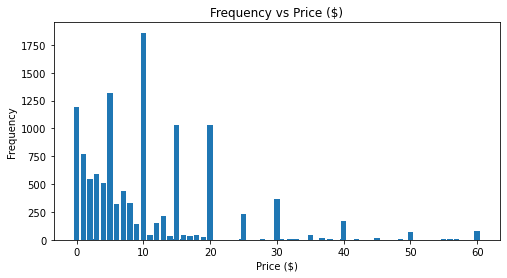

In [101]:
prices = df.original_price_tuned.value_counts()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x=prices.index, height=prices.values)
ax.set_title('Frequency vs Price ($)')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Frequency');

In [102]:
# This dataframe is referred to in Appendx A where I combine features for exploratory purposes.
df_2 = df.copy()

Lastly, let's remove features that we will not need for modeling purposes.

In [103]:
final_drop_columns = ['name',
                      'number_of_all_reviews',
                      'percentage_of_positive_all_reviews',
                      'Free_to_Play',
                      'MMO'
                     ]

df.drop(columns=final_drop_columns, inplace=True)

I decided to remove the `number_of_all_reviews` feature since those are values that will not be known if trying to make a prediction. I also removed the `Free_to_Play` and `MMO` categories as those are highly correlated with `original_price_tuned` and `Massively_Multiplayer`.

This is what the dataset looks like after all of this data cleaning:

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11939 entries, 0 to 40811
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   positive_reviews            11939 non-null  int64  
 1   original_price_tuned        11939 non-null  float64
 2   Action                      11939 non-null  int64  
 3   Adventure                   11939 non-null  int64  
 4   Casual                      11939 non-null  int64  
 5   Early_Access                11939 non-null  int64  
 6   Indie                       11939 non-null  int64  
 7   Massively_Multiplayer       11939 non-null  int64  
 8   RPG                         11939 non-null  int64  
 9   Racing                      11939 non-null  int64  
 10  Simulation                  11939 non-null  int64  
 11  Sports                      11939 non-null  int64  
 12  Strategy                    11939 non-null  int64  
 13  Valve                       119

## Predictive Modeling
***

This section will explore multiple classification and machine learning algorithms in an effort to find the most optimal model for predicting playerbase feedback.

### Classes and Functions

I decided to use a class for outputting information and plots for the models. I also decided to use a function for scaling purposes. I got the class and function from a GitHub repo, [here](https://github.com/flatiron-school/ds-classification_workflow_demo-opw32), and I did make some customizations to the class here and there for my own purposes.

In [105]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_neg_log_loss = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring="neg_log_loss")
        self.cv_log_loss = -(self.cv_neg_log_loss.mean())
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
            {self.cv_log_loss:.5f} log loss
        ''')
        print(cv_summary)

    
    def print_classification_metrics(self, y_pred):
        classification_metrics_summary = (
        f'''{classification_report(self.y, y_pred)}
            Accuracy Score = {self.model.score(self.X, self.y):.5f}
            Log Loss = {self.cv_log_loss:.5f}
        ''')
        print(classification_metrics_summary)
        accuracy = self.model.score(self.X, self.y)
        
        return round(accuracy,5)
        
    
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='blue',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax
    
    def plot_cm(self, fig, title):
        '''
        Plot the confusion matrix values given figure and title.
        '''
        fig.suptitle(title)
        
        fig = plot_confusion_matrix(self.model, self.X, self.y, ax=ax, display_labels=['Negative\nReview', 'Positive\nReview']);
        
        return fig

In [106]:
def scale_values(X, scaler):
    """
    Given a DataFrame and a fitted scaler, use the scaler to scale all of the features
    """
    scaled_array = scaler.transform(X)
    scaled_df = pd.DataFrame(scaled_array, columns=X.columns, index=X.index)
    
    return scaled_df

### Baseline Model - Dummy
***

Let's first establish a baseline, dummy model using a `DummyClassifier`.

I'll begin by setting my target as `positive_reviews` and then creating my train and test data.

In [107]:
X = df.drop('positive_reviews', axis=1)
y = df['positive_reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

I decided to use a `most_frequent` strategy to get a baseline model. So basically the model should predict the percentage of the most frequent value (0 or 1) in the train data.

CV Results for `dummy` model:
            0.53384 ± 0.00029 accuracy
            16.10060 log loss
        


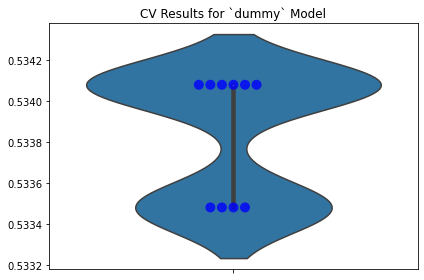

In [108]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)

dummy_model_train_results = ModelWithCV(model=dummy_model,
                                        model_name='dummy',
                                        X=X_train,
                                        y=y_train)

fig, ax = plt.subplots()

ax = dummy_model_train_results.plot_cv(ax)
plt.tight_layout()

dummy_model_train_results.print_cv_summary()
# Basically the same as the mean obtained from our describe function earlier

Based off of the CV results, looks like about 54% of the train data is being predicted accurately. This would make sense, since earlier when we performed `df.describe()`, we got a mean of 46% for `positive_review`. This tells me that the 0s (aka negative reviews) in `positive_review` will be the most frequent, covering 54% of the category. Hopefully, the test data shows a very simialr score, and let's plot a confusion matrix to make sure that in fact our negative reviews are the most frequent.

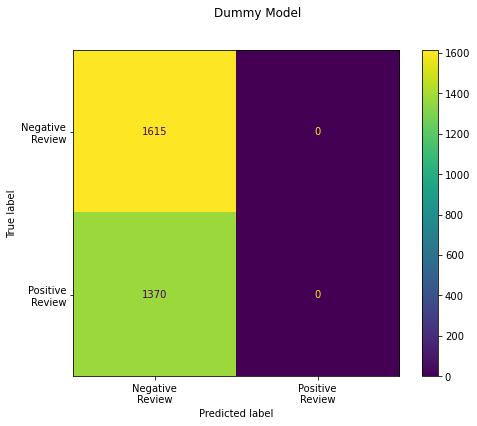

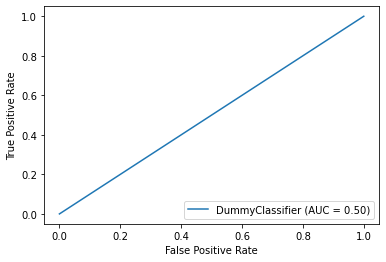

In [109]:
dummy_model_test_results = ModelWithCV(model=dummy_model,
                                       model_name='dummy',
                                       X=X_test,
                                       y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

dummy_model_test_results.plot_cm(fig, title="Dummy Model")

plot_roc_curve(dummy_model, X_test, y_test);

In [110]:
y_pred = dummy_model.predict(X_test)

dummy_accuracy = dummy_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1615
           1       0.00      0.00      0.00      1370

    accuracy                           0.54      2985
   macro avg       0.27      0.50      0.35      2985
weighted avg       0.29      0.54      0.38      2985

            Accuracy Score = 0.54104
            Log Loss = 15.85201
        


Notice that our test accuracy is very similar to our train accuracy at 54%! And our confusion matrix confirms that negative reviews are in fact the most frequent.

Let's add this accuracy score and the model name to two separate lists which will be used later in a plot showing model progression.

In [111]:
accuracy_list = []
accuracy_list.append(dummy_accuracy)

model_list = []
model_list.append('Dummy')

### 2nd Model - Simple Logistic Regression

Next, let's try out our first true classification algorithm, logistic regression.

CV Results for `simple_logreg` model:
            0.60264 ± 0.01432 accuracy
            0.65916 log loss
        


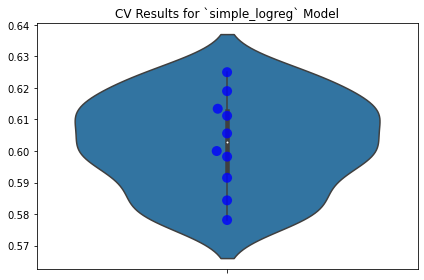

In [112]:
simple_logreg_model = LogisticRegression(random_state=42, penalty='none', max_iter=100000)
simple_logreg_model.fit(X_train, y_train)

simple_logreg_model_train_results = ModelWithCV(model=simple_logreg_model,
                                                model_name='simple_logreg',
                                                X=X_train,
                                                y=y_train)

fig, ax = plt.subplots()

ax = simple_logreg_model_train_results.plot_cv(ax)
plt.tight_layout()

simple_logreg_model_train_results.print_cv_summary()

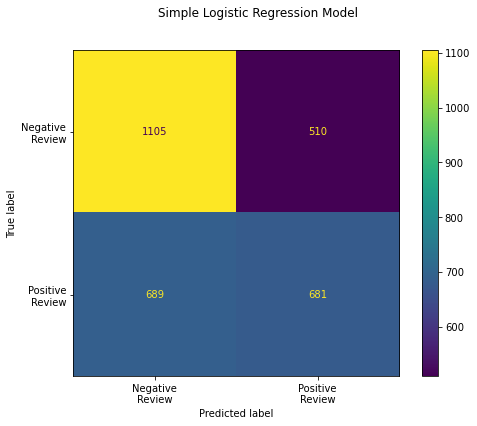

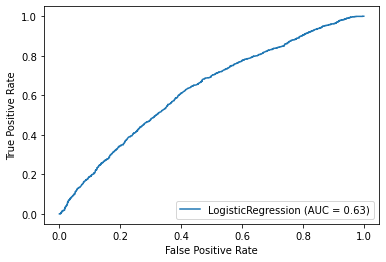

In [113]:
simple_logreg_model_test_results = ModelWithCV(model=simple_logreg_model,
                                               model_name='simple_logreg',
                                               X=X_test,
                                               y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

simple_logreg_model_test_results.plot_cm(fig, title="Simple Logistic Regression Model")

plot_roc_curve(simple_logreg_model, X_test, y_test);

In [114]:
y_pred = simple_logreg_model.predict(X_test)

simple_logreg_accuracy = simple_logreg_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1615
           1       0.57      0.50      0.53      1370

    accuracy                           0.60      2985
   macro avg       0.59      0.59      0.59      2985
weighted avg       0.60      0.60      0.59      2985

            Accuracy Score = 0.59832
            Log Loss = 0.66528
        


Looks like our logistic regression model is performing slightly better (6% better) than our dummy model!

### 3rd Model - Logistic Regression after Scaling

Let's try scaling our data this time and seeing if that makes our model perform any better.

I've decided to use a `MinMaxScaler` on my train data because I do not want to scale my categorical data. I would like to keep the categorical data still as 0s and 1s. This scaling will only affect the `original_price_tuned` feature, and will scale the feature between 0 and 1.

In [115]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scale_values(X_train, scaler)
X_test_sc = scale_values(X_test, scaler)

In [116]:
# # If you want to see how the prices column was scaled, run this:
# display(X_train_sc.head(10))

CV Results for `sc_logreg` model:
            0.60297 ± 0.01372 accuracy
            0.65912 log loss
        


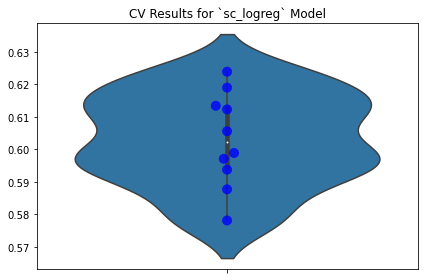

In [117]:
sc_logreg_model = LogisticRegression(random_state=42)
sc_logreg_model.fit(X_train_sc, y_train)

sc_logreg_model_train_results = ModelWithCV(model=sc_logreg_model,
                                            model_name='sc_logreg',
                                            X=X_train_sc,
                                            y=y_train)

fig, ax = plt.subplots()

ax = sc_logreg_model_train_results.plot_cv(ax)
plt.tight_layout()

sc_logreg_model_train_results.print_cv_summary()

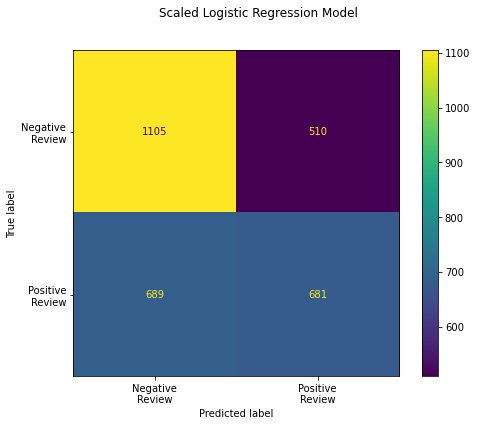

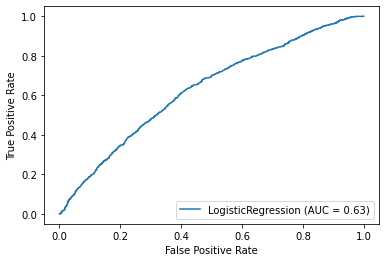

In [118]:
sc_logreg_model_test_results = ModelWithCV(model=sc_logreg_model,
                                           model_name='sc_logreg',
                                           X=X_test_sc,
                                           y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

sc_logreg_model_test_results.plot_cm(fig, title="Scaled Logistic Regression Model")

plot_roc_curve(sc_logreg_model, X_test_sc, y_test);

In [119]:
y_pred = sc_logreg_model.predict(X_test_sc)

sc_logreg_accuracy = sc_logreg_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1615
           1       0.57      0.50      0.53      1370

    accuracy                           0.60      2985
   macro avg       0.59      0.59      0.59      2985
weighted avg       0.60      0.60      0.59      2985

            Accuracy Score = 0.59832
            Log Loss = 0.66493
        


Surprisingly, scaling the data did not have much of any affect on the accuracy of the model, but scaling the model is necessary for our purposes.

### 4th Model - GridSearch Logistic Regression after Scaling

GridSearch will be very useful in finding the most optimal parameters for a Logistic Regression model.

I decided to try out different `C` and `solver` options as I wanted to experiment with regularization strength and different solvers on my training data.

In [120]:
gs_model = LogisticRegression()

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'solver': ['lbfgs', 'liblinear', 'sag'],
              'penalty': ['l2'], 
              'random_state': [42]
             }

gs_knn = GridSearchCV(gs_model, param_grid, cv=10)
gs_knn.fit(X_train_sc, y_train)

gs_knn.best_params_
# Output: {'C': 1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}

{'C': 1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}

Notice that these are the default values of the logistice regression (minus the `random_state`), which means our 3rd model is the most optimized. I  also don't want to increase the `C` value and introduce overfitting into my training data.

In [121]:
accuracy_list.append(sc_logreg_accuracy)
model_list.append('Logistic Regression')

### 5th Model - Simple KNN, k = 5, p = 2 (aka euclidean)

Let's now try using a KNN algorithm.

CV Results for `knn, k=5` model:
            0.58677 ± 0.01505 accuracy
            2.17010 log loss
        


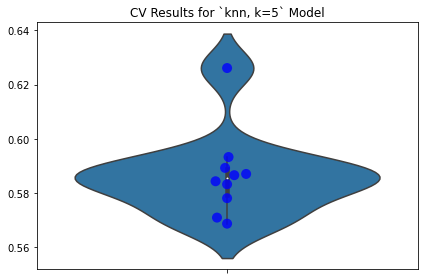

In [122]:
simple_knn_model = KNeighborsClassifier()
simple_knn_model.fit(X_train_sc, y_train)

simple_knn_model_train_results = ModelWithCV(model=simple_knn_model,
                                      model_name='knn, k=5',
                                      X=X_train_sc,
                                      y=y_train)

fig, ax = plt.subplots()

ax = simple_knn_model_train_results.plot_cv(ax)
plt.tight_layout()

simple_knn_model_train_results.print_cv_summary()

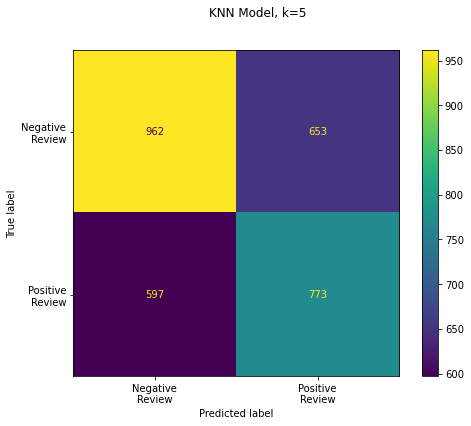

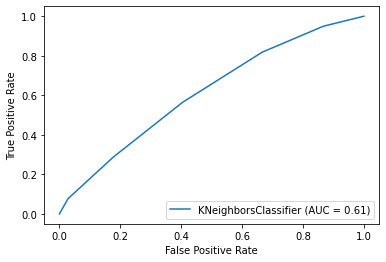

In [123]:
simple_knn_model_test_results = ModelWithCV(model=simple_knn_model,
                                            model_name='knn, k=5',
                                            X=X_test_sc,
                                            y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

simple_knn_model_test_results.plot_cm(fig, title="KNN Model, k=5");

plot_roc_curve(simple_knn_model, X_test_sc, y_test);

In [124]:
y_pred = simple_knn_model.predict(X_test_sc)

simple_knn_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1615
           1       0.54      0.56      0.55      1370

    accuracy                           0.58      2985
   macro avg       0.58      0.58      0.58      2985
weighted avg       0.58      0.58      0.58      2985

            Accuracy Score = 0.58124
            Log Loss = 1.68214
        


0.58124

Looks like this model approach did not yield a better accuracy result than the logistic regression model, but perhaps we can tune the parameters of our model and produce an optimal KNN model.

### 6th Model - GridSearch KNN

GridSearch will be very useful in finding the most optimal parameters for using a KNN model.

I decided I wanted to experiment with the number of neighbors as well as distance options (`weights` and `p`).

When I originally ran the GridSearch, I set `min_k` to 1 and `max_k` to 51. But, for the sake of time, I have updated the `min_k` to 31 and `max_k` to 43 to save a lot of time when running this code block. 

In [125]:
gs_model = KNeighborsClassifier()

# min_k = 1
# max_k = 53

min_k = 31
max_k = 43

param_grid = {'n_neighbors': list(range(min_k, max_k, 2)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3]
             }

gs_knn = GridSearchCV(gs_model, param_grid, cv=10)
gs_knn.fit(X_train_sc, y_train)

gs_knn.best_params_
# Output: {'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}

{'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}

Notice, the `n_neighbors` value is different than the default parameter value. Let's plug that into our model and see how that changes things!

CV Results for `gs_knn, k=35` model:
            0.60822 ± 0.01144 accuracy
            0.66039 log loss
        


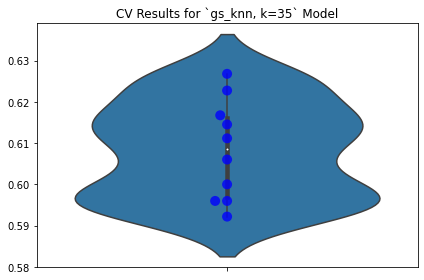

In [126]:
k = 35

gs_knn_model = KNeighborsClassifier(n_neighbors=k)
gs_knn_model.fit(X_train_sc, y_train)

gs_knn_model_train_results = ModelWithCV(model=gs_knn_model,
                                         model_name=f'gs_knn, k={k}',
                                         X=X_train_sc,
                                         y=y_train)

fig, ax = plt.subplots()

ax = gs_knn_model_train_results.plot_cv(ax)
plt.tight_layout()

gs_knn_model_train_results.print_cv_summary()

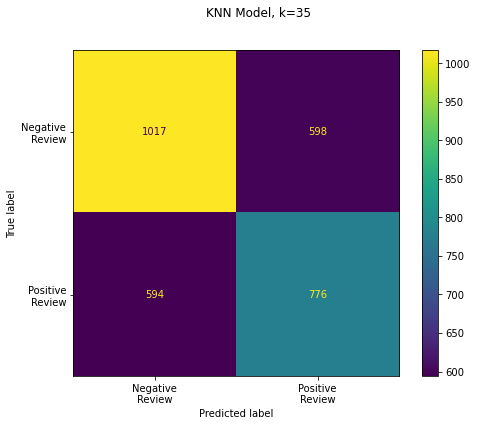

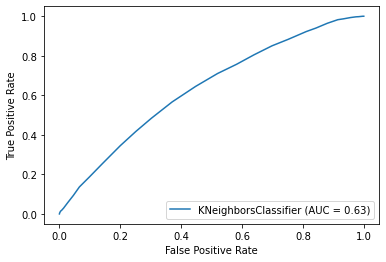

In [127]:
gs_knn_model_test_results = ModelWithCV(model=gs_knn_model,
                                        model_name=f'gs_knn, k={k}',
                                        X=X_test_sc,
                                        y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

gs_knn_model_test_results.plot_cm(fig, title=f"KNN Model, k={k}")

plot_roc_curve(gs_knn_model, X_test_sc, y_test);

In [128]:
y_pred = gs_knn_model.predict(X_test_sc)

knn_accuracy = gs_knn_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1615
           1       0.56      0.57      0.57      1370

    accuracy                           0.60      2985
   macro avg       0.60      0.60      0.60      2985
weighted avg       0.60      0.60      0.60      2985

            Accuracy Score = 0.60067
            Log Loss = 0.67265
        


Looks like this optimized KNN model is performing slightly better than our simple KNN model as well as our Logistic Regression model from earlier, but nothing significant.

In [129]:
accuracy_list.append(knn_accuracy)
model_list.append('KNN')

### 7th Model - Simple Random Forest

Let's now try using a Random Forest algorithm.

CV Results for `rf` model:
            0.59548 ± 0.01340 accuracy
            0.86297 log loss
        


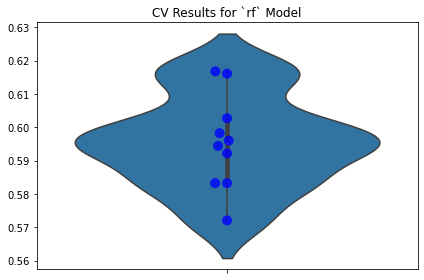

In [130]:
simple_rf_model = RandomForestClassifier(random_state=42)
simple_rf_model.fit(X_train, y_train)

simple_rf_model_train_results = ModelWithCV(model=simple_rf_model,
                                            model_name='rf',
                                            X=X_train,
                                            y=y_train)

fig, ax = plt.subplots()

ax = simple_rf_model_train_results.plot_cv(ax)
plt.tight_layout()

simple_rf_model_train_results.print_cv_summary()

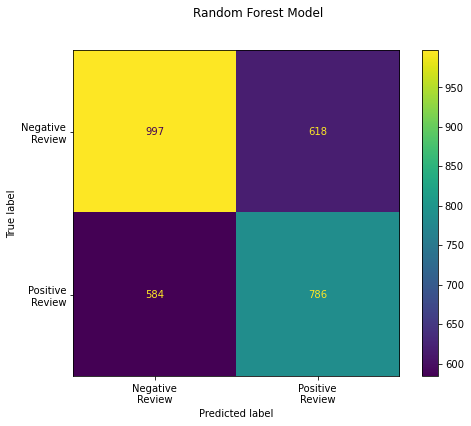

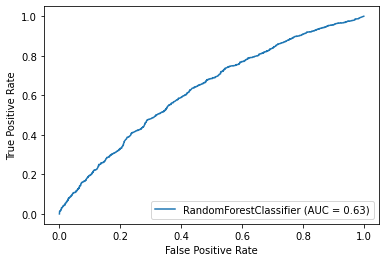

In [131]:
simple_rf_model_test_results = ModelWithCV(model=simple_rf_model,
                                           model_name='rf',
                                           X=X_test,
                                           y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

simple_rf_model_test_results.plot_cm(fig, title="Random Forest Model");

plot_roc_curve(simple_rf_model, X_test, y_test);

In [132]:
y_pred = simple_rf_model.predict(X_test)

simple_rf_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1615
           1       0.56      0.57      0.57      1370

    accuracy                           0.60      2985
   macro avg       0.60      0.60      0.60      2985
weighted avg       0.60      0.60      0.60      2985

            Accuracy Score = 0.59732
            Log Loss = 0.85604
        


0.59732

This model appears to be performing very similarly to the Logistic Regression and KNN models, but, again, let's try and optimize those parameters!

### 8th Model - GridSearch Random Forest

GridSearch will be very useful in finding the most optimal parameters when using a Random Forest model.

I decided I wanted to experiment with the number of trees as well as the depth of those trees and the number of features to consider when splitting. In addition, I wanted to experiment with how the quality of a split is measured (aka `gini` or `entropy`).

When I originally ran the GridSearch, I set `min_n_e` to 10, `max_n_e` to 111, `min_depth` to 5, and `_max_depth` to 16. But, for the sake of time, I have updated these to save a lot of time when running this code block.

In [133]:
gs_model = RandomForestClassifier()

# min_n_e = 10
# max_n_e = 111
# min_depth = 5
# _max_depth = 16

min_n_e = 80
max_n_e = 101
min_depth = 12
_max_depth = 15

param_grid = {'n_estimators': list(range(min_n_e, max_n_e, 10)),
              'criterion': ['gini', 'entropy'],
              'max_depth': list(range(min_depth, _max_depth)),
              'max_features': ['sqrt', 'log2'],
              'random_state': [42]
             }

gs_rf = GridSearchCV(gs_model, param_grid, cv=10)
gs_rf.fit(X_train_sc, y_train)

gs_rf.best_params_
# Output: 
# {'criterion': 'entropy',
#  'max_depth': 13,
#  'max_features': 'sqrt',
#  'n_estimators': 90,
#  'random_state': 42}

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'sqrt',
 'n_estimators': 90,
 'random_state': 42}

Notice that the `criterion`, `max_depth`, and `n_estimators` are all different from the default values, so let's try those out and see if they improve our Random Forest model.

CV Results for `gs_rf` model:
            0.62006 ± 0.01629 accuracy
            0.64952 log loss
        


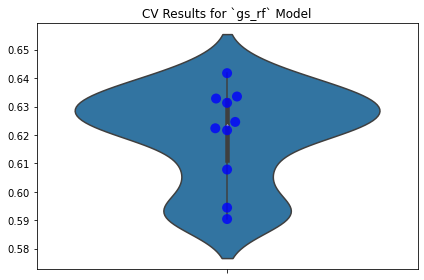

In [134]:
gs_rf_model = RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators = 90, random_state=42)
gs_rf_model.fit(X_train, y_train)

gs_rf_model_train_results = ModelWithCV(model=gs_rf_model,
                                        model_name='gs_rf',
                                        X=X_train,
                                        y=y_train)

fig, ax = plt.subplots()

ax = gs_rf_model_train_results.plot_cv(ax)
plt.tight_layout()

gs_rf_model_train_results.print_cv_summary()

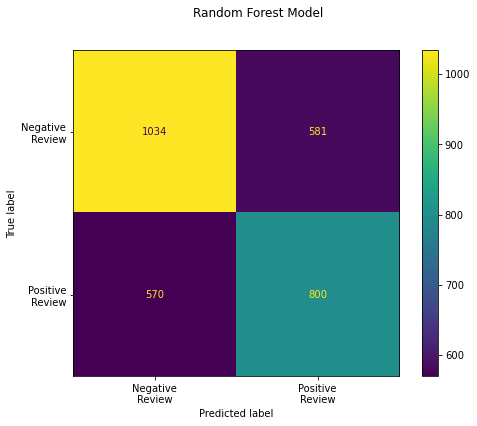

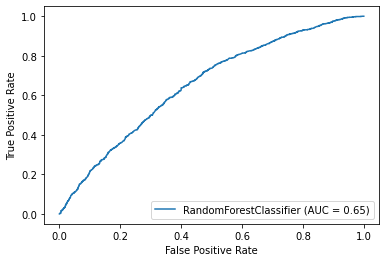

In [135]:
gs_rf_model_test_results = ModelWithCV(model=gs_rf_model,
                                       model_name='gs_rf',
                                       X=X_test,
                                       y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

gs_rf_model_test_results.plot_cm(fig, title="Random Forest Model");

plot_roc_curve(gs_rf_model, X_test, y_test);

In [136]:
y_pred = gs_rf_model.predict(X_test)

rf_accuracy = gs_rf_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1615
           1       0.58      0.58      0.58      1370

    accuracy                           0.61      2985
   macro avg       0.61      0.61      0.61      2985
weighted avg       0.61      0.61      0.61      2985

            Accuracy Score = 0.61441
            Log Loss = 0.66527
        


Looks like this optimized Ranndom Forest model is performing slightly better than all of our previous models, but still nothing significant.

In [137]:
accuracy_list.append(rf_accuracy)
model_list.append('Random Forest')

### 9th Model - Simple XGBoost

Let's now try using a XGBoost machine learning algorithm.

CV Results for `xgb` model:
            0.61615 ± 0.01559 accuracy
            0.68285 log loss
        


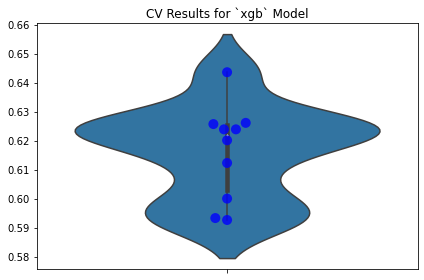

In [138]:
simple_xgb_model = XGBClassifier(random_state=42)
simple_xgb_model.fit(X_train, y_train)

simple_xgb_model_train_results = ModelWithCV(model=simple_xgb_model,
                                             model_name='xgb',
                                             X=X_train,
                                             y=y_train)

fig, ax = plt.subplots()

ax = simple_xgb_model_train_results.plot_cv(ax)
plt.tight_layout()

simple_xgb_model_train_results.print_cv_summary()

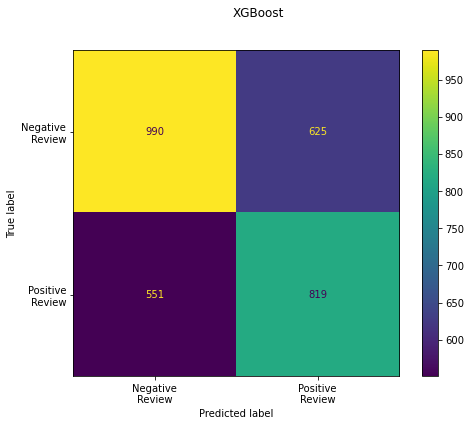

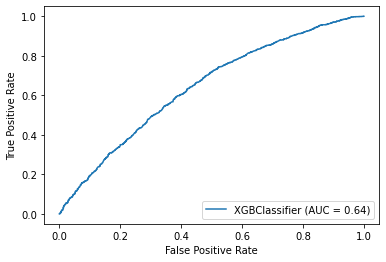

In [139]:
simple_xgb_model_test_results = ModelWithCV(model=simple_xgb_model,
                                            model_name='xgb',
                                            X=X_test,
                                            y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

simple_xgb_model_test_results.plot_cm(fig, title="XGBoost");

plot_roc_curve(simple_xgb_model, X_test, y_test);

In [140]:
y_pred = simple_xgb_model.predict(X_test)

simple_xgb_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.64      0.61      0.63      1615
           1       0.57      0.60      0.58      1370

    accuracy                           0.61      2985
   macro avg       0.60      0.61      0.60      2985
weighted avg       0.61      0.61      0.61      2985

            Accuracy Score = 0.60603
            Log Loss = 0.73415
        


0.60603

Once again, this model is performing very similarly to all of the other models: poorly. But one last thing to do...

### 10th Model - GridSearch XGBoost

GridSearch will be very useful in finding the most optimal parameters when using XGBoost.

I decided I wanted to experiment with the number of boosting rounds, the boosting learning rate, and the maximum tree depth, since I wanted to use a `gbtree` as the boost method.

When I originally ran the GridSearch, I set the learning rate and max depth to what is commented out below. But, for the sake of time, I have updated these to save a lot of time when running this code block.

In [141]:
gs_model = XGBClassifier()

# l_r = [0.001, 0.01, 0.1, 1, 10]
# _max_depth = list(range(3,11))

l_r = [0.1]
_max_depth = [4]

param_grid = {'n_estimators': list(range(180, 225, 5)),
              'learning_rate': l_r,
              'max_depth': _max_depth,
              'objective': ['binary:logistic'],
              'booster': ['gbtree'],
              'tree_method': ['exact'],
              'random_state': [42]
             }

gs_rf = GridSearchCV(gs_model, param_grid, cv=10)
gs_rf.fit(X_train_sc, y_train)

gs_rf.best_params_
# Output:
# {'booster': 'gbtree',
#  'learning_rate': 0.1,
#  'max_depth': 4,
#  'n_estimators': 200,
#  'objective': 'binary:logistic',
#  'random_state': 42,
#  'tree_method': 'exact'}

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200,
 'objective': 'binary:logistic',
 'random_state': 42,
 'tree_method': 'exact'}

Notice that the `learning_rate`, `max_depth`, and `n_estimators` are all different from the default values, so let's try those out and see if they improve our XGBoost model.

CV Results for `xgb` model:
            0.62553 ± 0.01520 accuracy
            0.64989 log loss
        


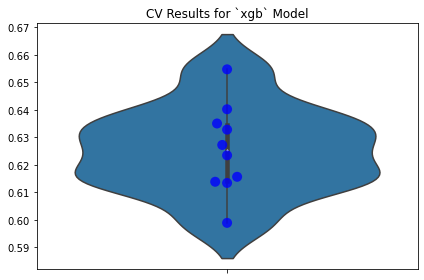

In [142]:
gs_xgb_model = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1,\
                             objective='binary:logistic', booster='gbtree',\
                             tree_method='exact', random_state=42)

gs_xgb_model.fit(X_train, y_train)

gs_xgb_model_train_results = ModelWithCV(model=gs_xgb_model,
                                         model_name='xgb',
                                         X=X_train,
                                         y=y_train)

fig, ax = plt.subplots()

ax = gs_xgb_model_train_results.plot_cv(ax)
plt.tight_layout()

gs_xgb_model_train_results.print_cv_summary()

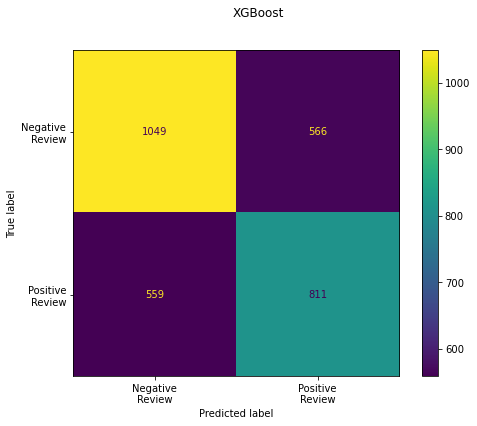

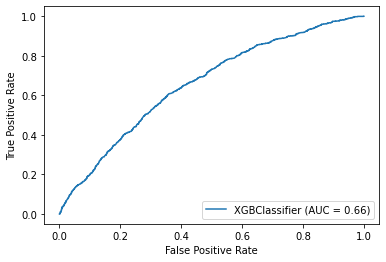

In [143]:
gs_xgb_model_test_results = ModelWithCV(model=gs_xgb_model,
                                            model_name='xgb',
                                            X=X_test,
                                            y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

gs_xgb_model_test_results.plot_cm(fig, title="XGBoost");

plot_roc_curve(gs_xgb_model, X_test, y_test);

In [144]:
y_pred = gs_xgb_model.predict(X_test)

xgb_accuracy = gs_xgb_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1615
           1       0.59      0.59      0.59      1370

    accuracy                           0.62      2985
   macro avg       0.62      0.62      0.62      2985
weighted avg       0.62      0.62      0.62      2985

            Accuracy Score = 0.62312
            Log Loss = 0.67658
        


Again, this model is just slightyly outperforming all of the other models when comparing accuracy score.

In [145]:
accuracy_list.append(xgb_accuracy)
model_list.append('XGBoost')

In [146]:
# display(accuracy_list)
# display(model_list)

## Results
***
I've chosen the XGBoost model as the "final" model, since it did have the best accuracy score compared to all of the other models. I've also provided plots of the model progression as well as the top 10 most imporant features that were used to build the XGBoost model.

### "Final Model" - XGBoost

Since the XGBoost model has the best accuracy score, this will have to be my "final" model.

CV Results for `xgb` model:
            0.62553 ± 0.01520 accuracy
            0.64989 log loss
        


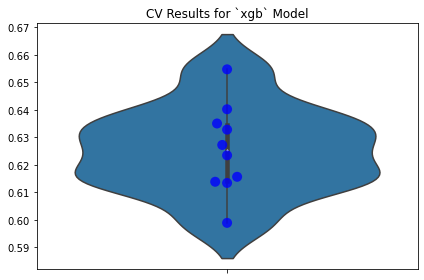

In [147]:
X = df.drop('positive_reviews', axis=1)
y = df['positive_reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

final_model = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1,\
                             objective='binary:logistic', booster='gbtree',\
                             tree_method='exact', random_state=42)

final_model.fit(X_train, y_train)

final_model_train_results = ModelWithCV(model=final_model,
                                         model_name='xgb',
                                         X=X_train,
                                         y=y_train)

fig, ax = plt.subplots()

ax = final_model_train_results.plot_cv(ax)
plt.tight_layout()

final_model_train_results.print_cv_summary()

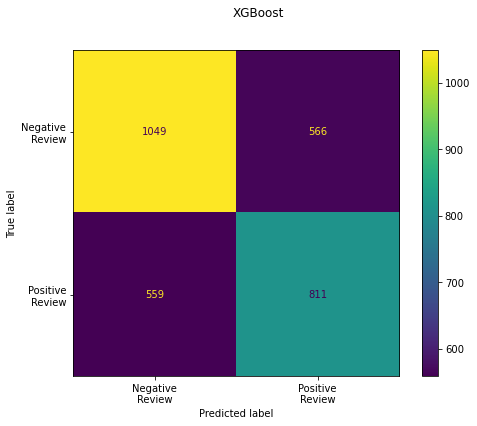

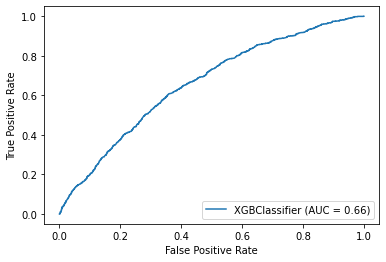

In [148]:
final_model_test_results = ModelWithCV(model=final_model,
                                            model_name='xgb',
                                            X=X_test,
                                            y=y_test)

fig, ax = plt.subplots(figsize=(8,6))

final_model_test_results.plot_cm(fig, title="XGBoost");

plot_roc_curve(final_model, X_test, y_test);

In [149]:
y_pred = final_model.predict(X_test)

final_accuracy = final_model_test_results.print_classification_metrics(y_pred)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1615
           1       0.59      0.59      0.59      1370

    accuracy                           0.62      2985
   macro avg       0.62      0.62      0.62      2985
weighted avg       0.62      0.62      0.62      2985

            Accuracy Score = 0.62312
            Log Loss = 0.67658
        


In [150]:
final_model_feature_importance = {name: importance for name, importance in zip(X_train.columns, final_model.feature_importances_)}

fi_series = pd.Series(final_model_feature_importance)
fi_series.sort_values(ascending=True, inplace=True)

feature_list = list(fi_series.index[-10:])
importance_list = list(fi_series.values[-10:]*100)

feature_list = list(map(lambda x: x.replace('_', ' ') if x.find('_') != -1 else x, feature_list))
feature_list = list(map(lambda x: x.replace('-', '') if (x.find('-') != -1 and x.find('player') != -1) else x, feature_list))
feature_list = list(map(lambda x: x.replace('-', '') if (x.find('-') != -1 and x.find('player') != -1) else x, feature_list))
feature_list = list(map(lambda x: x.title(), feature_list))

# display(feature_list)
# display(importance_list)

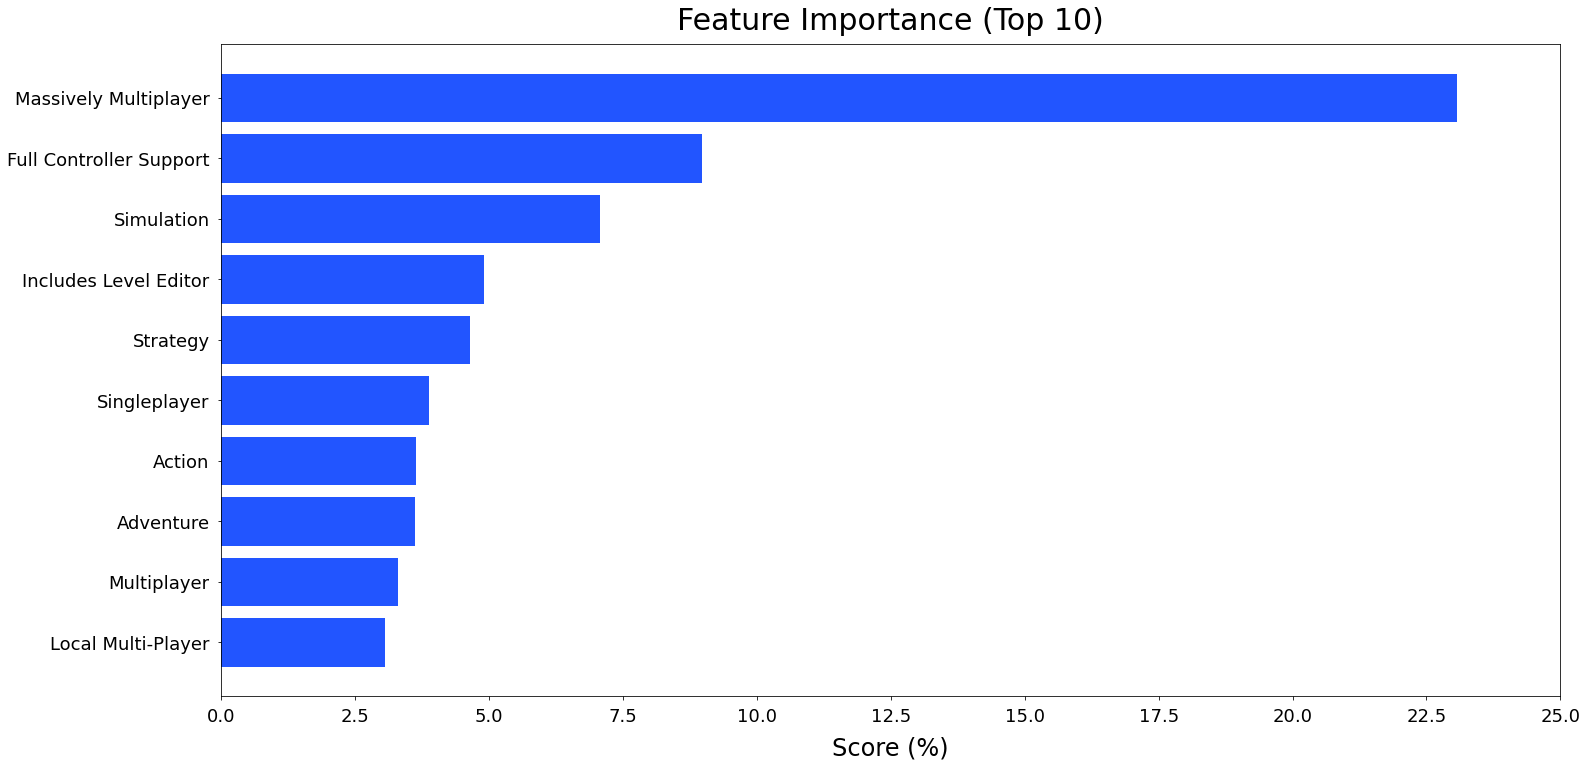

In [151]:
fig, ax = plt.subplots(figsize=(24,12))

ax.barh(y=feature_list, width=importance_list, color='#2255ff')

ax.set_title('Feature Importance (Top 10)', fontsize=30, pad=14)
ax.set_xlabel('Score (%)', fontsize=24, labelpad=10)
ax.set_ylabel('', fontsize=24, labelpad=10)
ax.set_xticks(np.arange(0, 27.5, 2.5))
ax.set_xticklabels(np.arange(0, 27.5, 2.5), fontsize=18)
ax.set_yticks(feature_list)
ax.set_yticklabels(feature_list, fontsize=18)
ax.tick_params(axis='both', which='major', pad=8)
    
plt.savefig('./images/feature_importance.jpg', dpi=300, transparent=True)

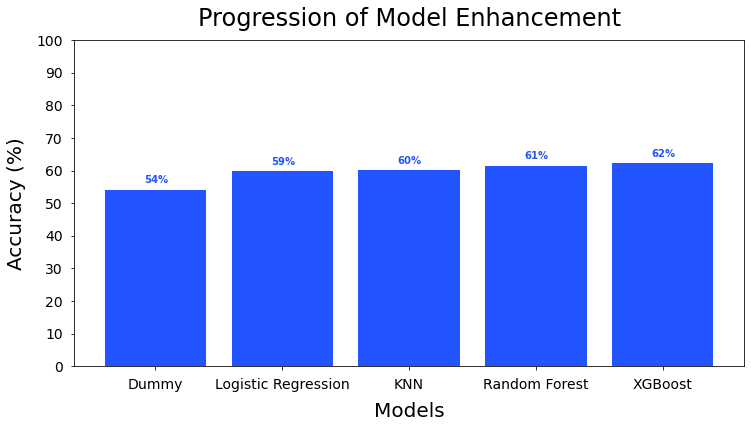

In [152]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=model_list, height=np.array(accuracy_list)*100, color='#2255ff')

ax.set_title('Progression of Model Enhancement', fontsize=24, pad=14)
ax.set_xlabel('Models', fontsize=20, labelpad=10)
ax.set_ylabel('Accuracy (%)', fontsize=20, labelpad=10)
ax.set_xticks(model_list)
ax.set_xticklabels(model_list, fontsize=14)
ax.set_yticks(np.arange(0, 110,10))
ax.set_yticklabels(np.arange(0, 110,10), fontsize=14)
ax.tick_params(axis='both', which='major', pad=8)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(np.array(accuracy_list)*100):
    string = str(int(abs(v))) + '%'
    plt.text(xlocs[i] - 0.09, v + 2, string, weight='bold', color='#2255ff')

plt.savefig('./images/model_progression.jpg', dpi=300, transparent=True)

## Conclusions
***
The final model, and frankly all of the other models, perform quite poorly. They will not be able to accurately determine what PC games will receive positive feedback.

This, however, does not mean that I should hang up the towel. This model does not have to be "final". There are still many other pathways to explore to try and produce a better model.

For one, I believe the biggest issue I have is that I have too many categorical features. I breifly discuss this in Appendix A, as I was beginning to experiment with merging some of the categorical features, in an attempt to reduce some of my categorical features and increase my accuracy scores. If I had even more time, I would explore the Steam Web API or other Steam games datasets on Kaggle and other data sources, and try to merge in more continuous features. In addition, there are plenty of other classification and machine learning algorithms that could be applied to my dataset that could yield a better predictive model.

This just all goes to show that there never really is a "final" model.

## Appendix A - Experimenting with Models after Feature Combination
***
After I was able to produce a final model with XGBoost, I began to experiment with feature combination a bit, but I was not able to complete my experimentation. However, I decided to include my experimentation in this appendix in hopes that I will one day take a look at it again.

From my preliminary experiments, some of the models appear to be producing marginally better accuracy scores, but nothing significant.

### Feature Combination

In [153]:
# df_2.info()

In [154]:
# comparison_column_1 = np.where((df_2['Full_controller_support'] == 1) | (df_2['Partial_Controller_Support'] == 1), 1, 0)
# df_2['controller_support'] = comparison_column_1

# comparison_column_2 = np.where((df_2['Co-op'] == 1) | (df_2['Cross-Platform_Multiplayer'] == 1) |\
#                                (df_2['MMO'] == 1) | (df_2['Multi-player'] == 1) |\
#                                (df_2['Online_Co-op'] == 1) | (df_2['Online_Multi-Player'] == 1), 1, 0)
# df_2['online_multi-player/co-op/mmo'] = comparison_column_2

# comparison_column_3 = np.where((df_2['Local_Co-op'] == 1) | (df_2['Local_Multi-Player'] == 1) |\
#                                (df_2['Shared/Split_Screen'] == 1) | (df_2['Single-player'] == 1), 1, 0)
# df_2['single-player_&_local_multi-player/co-op/split_screen'] = comparison_column_3

In [155]:
# display(df_2.info())
# display(df_2.controller_support.value_counts())
# display(df_2['online_multi-player/co-op/mmo'].value_counts())
# display(df_2['single-player_&_local_multi-player/co-op/split_screen'].value_counts())

In [156]:
# final_df2_drop_columns = ['name',
#                           'number_of_all_reviews',
#                           'percentage_of_positive_all_reviews',
#                           'Free_to_Play',
#                           'Co-op',
#                           'Cross-Platform_Multiplayer',
#                           'Full_controller_support',
#                           'Local_Co-op',
#                           'Local_Multi-Player',
#                           'MMO',
#                           'Multi-player',
#                           'Online_Co-op',
#                           'Online_Multi-Player',
#                           'Partial_Controller_Support',
#                           'Shared/Split_Screen',
#                           'Single-player'
#                          ]

# df_2.drop(columns=final_df2_drop_columns, inplace=True)

### 1st Model - Logistic Regression after Feature Combination and Scaling

In [157]:
# display(df_2.info())
# display(df_2.describe())

# X = df_2.drop('positive_reviews', axis=1)
# y = df_2['positive_reviews']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# scaler.fit(X_train)
# X_train_sc = scale_values(X_train, scaler)
# X_test_sc = scale_values(X_test, scaler)

# display(X_train_sc.describe())
# display(X_train_sc.head(10))

# sc_combo_logreg_model = LogisticRegression(random_state=42)
# sc_combo_logreg_model.fit(X_train_sc, y_train)

# sc_combo_logreg_model_train_results = ModelWithCV(model=sc_combo_logreg_model,
#                                                   model_name='sc_combo_logreg',
#                                                   X=X_train_sc,
#                                                   y=y_train)

# fig, ax = plt.subplots()

# ax = sc_combo_logreg_model_train_results.plot_cv(ax)
# plt.tight_layout()

# sc_combo_logreg_model_train_results.print_cv_summary()

In [158]:
# sc_combo_logreg_model_test_results = ModelWithCV(model=sc_combo_logreg_model,
#                                                  model_name='sc_combo_logreg',
#                                                  X=X_test_sc,
#                                                  y=y_test)

# fig, ax = plt.subplots(figsize=(8,6))

# sc_combo_logreg_model_test_results.plot_cm(fig, title="Scaled Logistic Regression Model After Combination of Features")

# plot_roc_curve(sc_combo_logreg_model, X_train_sc, y_train);

In [159]:
# y_pred = sc_combo_logreg_model.predict(X_test_sc)

# sc_combo_logreg_accuracy = sc_combo_logreg_model_test_results.print_classification_metrics(y_pred)

### 2nd Model - KNN after Feature Combination, k = 5, p = 2 (aka euclidean)

In [160]:
# combo_knn_model = KNeighborsClassifier()
# combo_knn_model.fit(X_train_sc, y_train)
# y_pred = combo_knn_model.predict(X_test_sc)

# combo_knn_model_train_results = ModelWithCV(model=combo_knn_model,
#                                             model_name='knn, k=5',
#                                             X=X_train_sc,
#                                             y=y_train)

# fig, ax = plt.subplots()

# ax = combo_knn_model_train_results.plot_cv(ax)
# plt.tight_layout()

# combo_knn_model_train_results.print_cv_summary()

In [161]:
# combo_knn_model_test_results = ModelWithCV(model=combo_knn_model,
#                                            model_name='knn, k=5',
#                                            X=X_test_sc,
#                                            y=y_test)

# fig, ax = plt.subplots(figsize=(8,6))

# combo_knn_model_test_results.plot_cm(fig, title="KNN Model, k=5")

# plot_roc_curve(combo_knn_model, X_test_sc, y_test);

In [162]:
# y_pred = combo_knn_model.predict(X_test_sc)

# combo_knn_model_test_results.print_classification_metrics(y_pred)

### 3rd Model - GridSearch KNN after Feature Combination

In [163]:
# gs_model = KNeighborsClassifier()

# min_k = 55
# max_k = 85

# param_grid = {'n_neighbors': list(range(min_k, max_k, 2)),
#               'weights': ['uniform', 'distance'],
#               'p': [1, 2, 3]
#              }

# gs_combo_knn = GridSearchCV(gs_model, param_grid, cv=10)
# gs_combo_knn.fit(X_train_sc, y_train)

In [164]:
# gs_combo_knn.best_params_
# # Output:

In [165]:
# k = None
# p = None

# gs_combo_knn_model = KNeighborsClassifier(n_neighbors=k, p=p)
# gs_combo_knn_model.fit(X_train_sc, y_train)

# gs_combo_knn_model_train_results = ModelWithCV(model=gs_combo_knn_model,
#                                                model_name=f'gs_combo_knn, k={k}, p={p}',
#                                                X=X_train_sc,
#                                                y=y_train)

# fig, ax = plt.subplots()

# ax = gs_combo_knn_model_train_results.plot_cv(ax)
# plt.tight_layout()

# gs_combo_knn_model_train_results.print_cv_summary()

In [166]:
# gs_combo_knn_model_test_results = ModelWithCV(model=gs_combo_knn_model,
#                                               model_name=f'gs_combo_knn, k={k}, p={p}',
#                                               X=X_test_sc,
#                                               y=y_test)

# fig, ax = plt.subplots(figsize=(8,6))

# gs_combo_knn_model_test_results.plot_cm(fig, title=f"KNN Model, k={k}, p={p}")

# plot_roc_curve(gs_combo_knn_model, X_test_sc, y_test);

In [167]:
# y_pred = gs_combo_knn_model.predict(X_test_sc)

# gs_combo_knn_model_test_results.print_classification_metrics(y_pred)

### 4th Model - Random Forest after Feature Combination

In [168]:
# combo_rf_model = RandomForestClassifier(random_state=42)
# combo_rf_model.fit(X_train, y_train)

# combo_rf_model_train_results = ModelWithCV(model=combo_rf_model,
#                                            model_name='rf',
#                                            X=X_train,
#                                            y=y_train)

# fig, ax = plt.subplots()

# ax = combo_rf_model_train_results.plot_cv(ax)
# plt.tight_layout()

# combo_rf_model_train_results.print_cv_summary()

In [169]:
# combo_rf_model_test_results = ModelWithCV(model=combo_rf_model,
#                                           model_name='rf',
#                                           X=X_test,
#                                           y=y_test)

# fig, ax = plt.subplots(figsize=(8,6))

# combo_rf_model_test_results.plot_cm(fig, title="Random Forest Model");

# plot_roc_curve(combo_rf_model, X_test, y_test);

In [170]:
# y_pred = combo_rf_model.predict(X_test)

# combo_rf_model_test_results.print_classification_metrics(y_pred)

### 5th Model - GridSearch Random Forest after Feature Combination

In [171]:
# gs_model = RandomForestClassifier()

# param_grid = {'n_estimators': list(range(90, 130, 5)),
#               'max_depth': list(range(9, 13)),
#               'random_state': [42]
#              }

# gs_rf = GridSearchCV(gs_model, param_grid, cv=10)
# gs_rf.fit(X_train_sc, y_train)

In [172]:
# gs_rf.best_params_
# # Output: 

In [173]:
# gs_combo_rf_model = RandomForestClassifier(max_depth=None, n_estimators=None, random_state=42)
# gs_combo_rf_model.fit(X_train, y_train)

# gs_combo_rf_model_train_results = ModelWithCV(model=gs_combo_rf_model,
#                                               model_name='rf',
#                                               X=X_train,
#                                               y=y_train)

# fig, ax = plt.subplots()

# ax = gs_combo_rf_model_train_results.plot_cv(ax)
# plt.tight_layout()

# gs_combo_rf_model_train_results.print_cv_summary()

In [174]:
# gs_combo_rf_model_test_results = ModelWithCV(model=gs_combo_rf_model,
#                                              model_name='rf',
#                                              X=X_test,
#                                              y=y_test)

# fig, ax = plt.subplots(figsize=(8,6))

# gs_combo_rf_model_test_results.plot_cm(fig, title="Random Forest Model");

# plot_roc_curve(gs_combo_rf_model, X_test, y_test);

In [175]:
# y_pred = gs_combo_rf_model.predict(X_test)

# gs_combo_rf_model_test_results.print_classification_metrics(y_pred)

## Appendix B - Plots for Presentation

Just about everything had to be white...

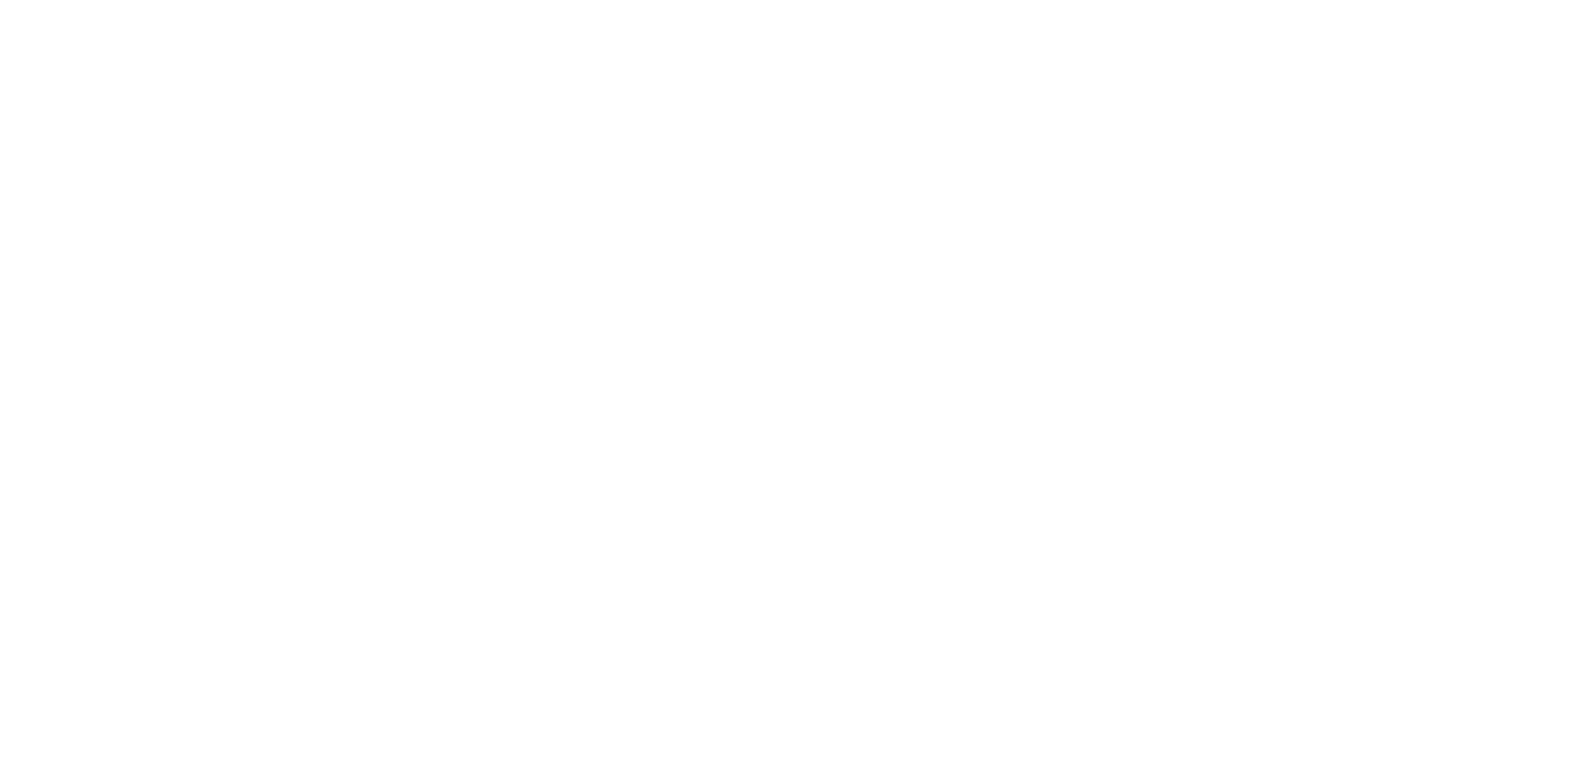

In [176]:
fig, ax = plt.subplots(figsize=(24,12))

white = '#ffffff'

ax.barh(y=feature_list, width=importance_list, color=white)

ax.set_title('Feature Importance (Top 10)', fontsize=30, pad=14, color=white)
ax.set_xlabel('Score (%)', fontsize=24, labelpad=10, color=white)
ax.set_ylabel('', fontsize=24, labelpad=10, color=white)
ax.set_xticks(np.arange(0, 27.5, 2.5))
ax.set_xticklabels(np.arange(0, 27.5, 2.5), fontsize=18)
ax.set_yticks(feature_list)
ax.set_yticklabels(feature_list, fontsize=18)
ax.tick_params(axis='both', which='major', pad=8, colors=white)
for spine in ax.spines.values():
    spine.set_edgecolor(white)
    
plt.savefig('./images/feature_importance_presentation.png', dpi=300, transparent=True)

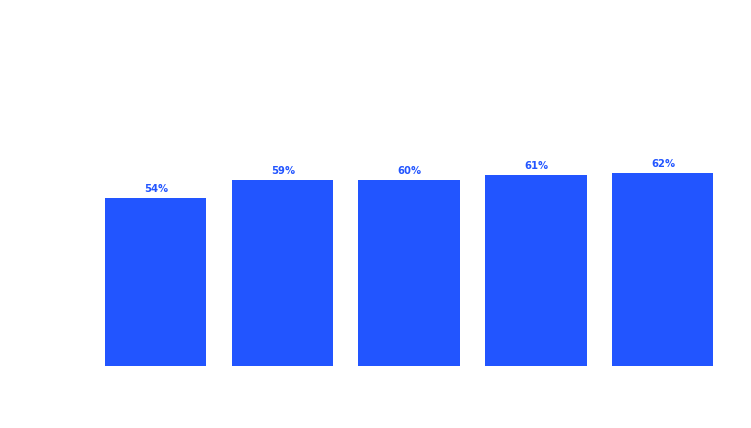

In [177]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=model_list, height=np.array(accuracy_list)*100, color='#2255ff', )
ax.bar(x=model_list, height=100-np.array(accuracy_list)*100, bottom=np.array(accuracy_list)*100, color=white)

ax.set_title('Progression of Model Enhancement', fontsize=24, pad=14, color=white)
ax.set_xlabel('Models', fontsize=20, labelpad=10, color=white)
ax.set_ylabel('Accuracy (%)', fontsize=20, labelpad=10, color=white)
ax.set_xticks(model_list)
ax.set_xticklabels(model_list, fontsize=14)
ax.set_yticks(np.arange(0, 110,10))
ax.set_yticklabels(np.arange(0, 110,10), fontsize=14)
ax.tick_params(axis='both', which='major', pad=8, colors=white)
for spine in ax.spines.values():
    spine.set_edgecolor(white)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(np.array(accuracy_list)*100):
    string = str(int(abs(v))) + '%'
    plt.text(xlocs[i] - 0.09, v + 2, string, weight='bold', color='#2255ff')

plt.savefig('./images/model_progression_presentation.png', dpi=300, transparent=True)

## Appendix C - Extra Models
***
These models have been rendered useless since I learned about GridSearch. But they still show an interesting approach I took towards essentially creating a customized function that acted as a GridSearch for a KNN model.

### KNN, k = 29, p = 2 (aka euclidean)

In [178]:
# def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=50, p=2):
#     best_k = 0
#     best_score = 0.0
#     for k in range(min_k, max_k+1, 2):
#         print(k)
#         knn = KNeighborsClassifier(n_neighbors=k, p=p)
#         knn.fit(X_train, y_train)
#         preds = knn.predict(X_test)
#         accuracy = accuracy_score(y_test, preds)
#         print(accuracy)
#         print('')
#         if accuracy > best_score:
#             best_k = k
#             best_score = accuracy
    
#     print("Best Value for k: {}".format(best_k))
#     print("Accuracy Score: {}".format(best_score))
    
#     return best_k

In [179]:
# k = find_best_k(X_train_sc, y_train, X_test_sc, y_test)

In [180]:
# knn_model_2 = KNeighborsClassifier(n_neighbors=k)
# knn_model_2.fit(X_train_sc, y_train)
# y_pred = knn_model_2.predict(X_test_sc)

# knn_model_2_results = ModelWithCV(model=knn_model_2,
#                                   model_name=f'knn, k={k}',
#                                   X=X_train_sc,
#                                   y=y_train)

# fig, ax = plt.subplots()

# ax = knn_model_2_results.plot_cv(ax)
# plt.tight_layout()

# knn_model_2_results.print_cv_summary()

In [181]:
# fig, ax = plt.subplots()

# fig.suptitle(f"KNN Model, k={k}")

# plot_confusion_matrix(knn_model_2, X_train_sc, y_train, ax=ax, display_labels=['Negative\nReview', 'Positive\nReview']);

In [182]:
# plot_roc_curve(knn_model_2, X_train_sc, y_train);

In [183]:
# print(classification_report(y_test, y_pred))
# display(knn_model_2.score(X_test_sc, y_test))
# knn_neg_log_loss_cv = cross_val_score(knn_model_2, X_test_sc, y_test, cv=10, scoring="neg_log_loss")
# knn_log_loss = -(knn_neg_log_loss_cv.mean())
# display(knn_log_loss)

### KNN, k = 29, p = 3

In [184]:
# k = find_best_k(X_train_sc, y_train, X_test_sc, y_test, p=3)

In [185]:
# knn_model_3 = KNeighborsClassifier(n_neighbors=k, p=3)
# knn_model_3.fit(X_train_sc, y_train)
# y_pred = knn_model_3.predict(X_test_sc)

# knn_model_3_results = ModelWithCV(model=knn_model_3,
#                                   model_name=f'knn, k={k}',
#                                   X=X_train_sc,
#                                   y=y_train)

# fig, ax = plt.subplots()

# ax = knn_model_3_results.plot_cv(ax)
# plt.tight_layout()

# knn_model_3_results.print_cv_summary()

In [186]:
# fig, ax = plt.subplots()

# fig.suptitle(f"KNN Model, k={k}")

# plot_confusion_matrix(knn_model_3, X_train_sc, y_train, ax=ax, display_labels=['Negative\nReview', 'Positive\nReview']);

In [187]:
# plot_roc_curve(knn_model_3, X_train_sc, y_train);

In [188]:
# print(classification_report(y_test, y_pred))
# display(knn_model_3.score(X_test_sc, y_test))
# knn_neg_log_loss_cv = cross_val_score(knn_model_3, X_test_sc, y_test, cv=10, scoring="neg_log_loss")
# knn_log_loss = -(knn_neg_log_loss_cv.mean())
# display(knn_log_loss)